# ***ML project***

***Nima Fathi***
<br>
***Rouzbeh Meshkinnejad***
<br>
***Amin Ravanbakhsh***

# **init**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read datas from google drive
df_train = pd.read_csv('/content/drive/MyDrive/ML_project/train_data.csv')
df_real_test = pd.read_csv('/content/drive/MyDrive/ML_project/test_data.csv')

<div dir='rtl'>
داده‌های ترین و تست را مشاهده می‌کنیم
</div>

In [ ]:
df_train.sample(10)

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
2824165,2147911,1579329464343,0,10,3096,1316,6640,279,7702,1,1,0,315,3608410,1307504,0
1814699,3167769,1578942960202,2,22,1209,1988,172,2,633,0,0,0,2,7537856,1877819,0
1629839,3346308,1578893131577,2,8,1419,3186,535,10,6262,0,0,0,11,154469,1975838,1
2689402,2287765,1579281287957,6,20,6883,3382,4611,66,5318,0,0,1,69,45865,1369941,0
1495868,3426097,1578871782326,2,2,3409,7626,5447,2347,496,0,0,0,35461,7416640,2016223,0
3098623,1900147,1579417383057,1,10,2294,1059,6815,81,13859,1,1,4,86,111885,1143352,0
1668089,3323496,1578898339844,2,10,1481,6341,5542,34,6679,0,0,0,35,376804,1355727,0
866024,3952822,1578683416196,6,22,3096,2806,231,8,13247,1,1,4,9,2307991,2293609,0
252305,4527642,1578484440997,4,15,9135,9181,4348,86,3452,1,1,0,91,294079,2342142,0
488802,4338007,1578549888076,5,9,9441,7769,4264,486,10521,0,0,0,634,8116,215073,0


In [ ]:
count_missing = df_train.isnull().sum()
missing_value_df = pd.DataFrame({ 'Count Missing' : count_missing})
missing_value_df

,Count Missing
displayId,0
timestamp,0
dayOfWeek,0
hourOfDay,0
advertiserId,0
campaignId,0
creativeId,0
publisher,0
widgetId,0
device,0


In [ ]:
df_real_test.sample(10)

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId
271171,984106,1579707547994,4,19,5687,3082,5649,31,1882,0,0,0,32,9661976,549329
353585,920741,1579739949430,5,4,10103,480,461,34,6679,1,1,4,35,279986,505674
378309,902322,1579747106666,5,6,5300,2004,346,0,7759,0,0,0,0,9957619,493107
603047,706102,1579808355544,5,23,5387,2544,7341,20,13728,0,0,0,21,9969748,353007
312732,949199,1579716603383,4,21,10556,7770,7193,131,8279,0,0,1,139,9828762,525334
414202,875770,1579755567758,5,8,8414,6155,6235,63,1795,1,1,0,66,9969594,474225
323590,942761,1579718735233,4,22,5387,2544,7331,20,1221,2,2,2,21,205,520762
964617,375693,1579944179902,0,12,6362,3635,7784,2,3637,0,0,0,2,10161361,104451
979689,361697,1579950316571,0,14,3096,2086,6417,34,6679,0,0,1,35,10405745,91850
246790,1010005,1579701224438,4,17,3409,7626,7450,169,4104,0,0,0,180,110861,567114


Check statistics of train data

In [ ]:
df_train.describe()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
count,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06
mean,3.044210e+06,1.579005e+12,2.822654e+00,1.128271e+01,4.851426e+03,4.556158e+03,3.923456e+03,2.463082e+02,7.500866e+03,3.409207e-01,4.306032e-01,1.209916e+00,1.848337e+03,5.065981e+06,1.501631e+06,2.234841e-01
std,1.019521e+06,3.571385e+08,1.914881e+00,5.618726e+00,2.899004e+03,2.647040e+03,2.482294e+03,5.164171e+02,4.301190e+03,4.817837e-01,6.516009e-01,2.629931e+00,6.529483e+03,3.424284e+06,7.132266e+05,4.165801e-01
min,1.115095e+06,1.578429e+12,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+01,6.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,8.000000e+00,0.000000e+00
25%,2.175378e+06,1.578715e+12,1.000000e+00,7.000000e+00,2.167000e+03,2.329000e+03,1.012000e+03,1.100000e+01,3.637000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,5.285000e+05,9.327162e+05,0.000000e+00
50%,3.118769e+06,1.578971e+12,3.000000e+00,1.000000e+01,4.705000e+03,4.355000e+03,5.102000e+03,3.300000e+01,7.759000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,6.518645e+06,1.545785e+06,0.000000e+00
75%,3.894130e+06,1.579330e+12,4.000000e+00,1.600000e+01,7.291000e+03,6.850000e+03,5.930000e+03,1.160000e+02,1.149700e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.600000e+02,7.735219e+06,2.109148e+06,0.000000e+00
max,4.706267e+06,1.579639e+12,6.000000e+00,2.300000e+01,1.074600e+04,9.523000e+03,7.268000e+03,2.551000e+03,1.436600e+04,3.000000e+00,6.000000e+00,1.020000e+02,4.037200e+04,9.692209e+06,2.688642e+06,1.000000e+00


Check statistics of test data

In [ ]:
df_real_test.describe()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId
count,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06,1.072876e+06
mean,7.538532e+05,1.579801e+12,3.808967e+00,1.238156e+01,4.995696e+03,3.996691e+03,5.834600e+03,2.522411e+02,7.709239e+03,2.709978e-01,3.599167e-01,1.107684e+00,1.752318e+03,6.331112e+06,3.572413e+05
std,2.740943e+05,1.001808e+08,2.137877e+00,5.847568e+00,2.591783e+03,2.411439e+03,2.414724e+03,5.061259e+02,4.416038e+03,4.538301e-01,6.329738e-01,2.517653e+00,6.382043e+03,4.390365e+06,2.010032e+05
min,1.516500e+05,1.579639e+12,0.000000e+00,0.000000e+00,3.900000e+01,3.000000e+01,8.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,8.000000e+00
25%,5.074710e+05,1.579707e+12,4.000000e+00,7.000000e+00,3.137000e+03,2.292000e+03,5.855000e+03,1.300000e+01,3.637000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,4.563750e+05,1.770708e+05
50%,7.677310e+05,1.579787e+12,4.000000e+00,1.200000e+01,5.513000e+03,3.790000e+03,7.002000e+03,3.600000e+01,7.759000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.700000e+01,9.518592e+06,3.588745e+05
75%,9.871010e+05,1.579886e+12,5.000000e+00,1.700000e+01,6.578000e+03,5.773000e+03,7.306000e+03,1.570000e+02,1.215300e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+02,9.951134e+06,5.265570e+05
max,1.204095e+06,1.579984e+12,6.000000e+00,2.300000e+01,1.074900e+04,9.418000e+03,7.867000e+03,2.599000e+03,1.436600e+04,3.000000e+00,7.000000e+00,7.900000e+01,4.055600e+04,1.056114e+07,6.972330e+05


<div dir='rtl'>
بخش x و y داده را جدا می‌کنیم:
</div>

In [ ]:
def split_X_Y_train_to_numpy(df_train):
    Y = df_train['clicked'].to_numpy()
    X = df_train.drop(columns = ['clicked']).to_numpy()
    return X, Y

# **EDA**

<div dir='rtl'>
داده‌های ترین را به کتگوری کلیک تقسیم می‌کنیم (کلیک شده یا نشده‌اند.)
</div>

In [ ]:
df_counts = df_train['clicked'].value_counts()
 
n_clicked_count = df_counts[0]
p_clicked_count = df_counts[1]
 
df_p_train = df_train[df_train['clicked'] == 1]
df_n_train = df_train[df_train['clicked'] == 0]
print(len(df_p_train))
print(len(df_n_train))

842181
2926235


<div dir='rtl'>
همانطور که در خروجی بالا می‌بینیم دیتاست ما حالت نامتوازن داره یا به اصطلاح imbalanced است.
این حجم عدم توازن در خروجی در روش‌های دسته‌بندی باعث می‌شود خروجی ما به سمت تخمین نزدیک به ۱۰۰٪ داده‌های تست و دیگر داده‌ها به صورت دسته با دیتا بیشتر برود.
<br>
حال برای حل این مشکل روش‌های متفاوتی وجود دارد. ما در اینجا به پیاده‌سازی و بررسی دو دسته راه‌حل با نام‌های undersampling و oversampling می‌پردازیم.
<br>
<b> Undersampling (down-sample):</b>
<br>
در این روش ما به صورت رندوم بخشی از داده کلاس بزرگتر را حذف می‌کنیم تا به صورت نسبی تعداد داده‌های دو گروه برابر شوند.
<br>
<b> Oversampling (up-sample):<b>
<br>
این فرآیند تولید داده های ترکیبی است که سعی می کند به طور تصادفی نمونه ای از ویژگی ها را از مشاهدات در کلاس اقلیت تولید کند.
<br>
اصولا این روش پیچیده‌تر است و برای آن روش‌های متفاوتی وجود دارد از روش‌های معروف آن که ماهم از‌ آن بهره بردیم SMOTE نام دارد.
</div>

***َUp-sample minority class***

In [ ]:
from sklearn.utils import resample

In [ ]:
df_counts = df_train['clicked'].value_counts()
 
n_clicked_count = df_counts[0]
p_clicked_count = df_counts[1]
 
df_p_train = df_train[df_train['clicked'] == 1]
df_n_train = df_train[df_train['clicked'] == 0]
# df_p_upsampled = resample(df_p_train, replace=True, n_samples = n_clicked_count, random_state = int(n_clicked_count * 0.3))
# df_upsampled = pd.concat([df_n_train, df_p_upsampled])
# print('positive class shape before upsampling: {}'.format(df_p_train.shape))
# print('positive class shape after upsampling: {}'.format(df_p_upsampled.shape))

<div dir='rtl'>
همانطور که در بالا می‌بینید این روش تعداد زیادی نمونه برای کلاس کوچکتر جنریت کردیم تا اندازه کلاس‌ها برابر شوند.
</div>

***Down-sample majority class***

In [ ]:
df_n_downsampled = resample(df_n_train, replace = False, n_samples = p_clicked_count, random_state = int(n_clicked_count*0.3))
df_downsampled = pd.concat([df_n_downsampled, df_p_train])
print('negative class\'s shape before downsampling: {}'.format(df_n_train.shape))
print('negative class\'s shape after downsampling: {}'.format(df_n_downsampled.shape))

negative class's shape before downsampling: (2926235, 16)
negative class's shape after downsampling: (842181, 16)


In [ ]:
print(df_train.shape)
print(df_n_train.shape)

(3768416, 16)
(2926235, 16)


<div dir='rtl'>
همانطور که در بالا می‌بینید این روش تعداد داده‌های کلاس بزرگتر را کم می‌کند تا برابر با تعداد داده‌های کلاس کوچکتر شود.
</div>

<div dir='rtl'>
در این مرحله سعی می‌کنیم ارتباط فیچر‌ها با هم را پیدا کنیم و فیچر‌هایی که همبستگی بسیار زیادی دارند یا یکی از انها را حذف کنیم. اینجوری فضای ویژگی‌های ما خیلی کوچکتر و در نتیجه بدون از دست دادن بخش قابل توجهی از ارزش دیتا سرعت مدل‌هایمان افزایش پیدا می‌کند.
</div>

***Train Correlation***

In [ ]:
df_train.corr()

,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,widgetId,device,browser,source,docId,userId,clicked
dayOfWeek,1.000000,0.014209,-0.054472,0.027222,-0.068386,0.020309,-0.046274,-0.003472,-0.028159,-0.057686,0.169751,0.005541
hourOfDay,0.014209,1.000000,-0.062731,-0.038465,0.089439,0.015599,-0.098947,-0.011445,0.033141,-0.048379,-0.057528,0.025827
advertiserId,-0.054472,-0.062731,1.000000,-0.006102,-0.088942,-0.018315,0.227712,0.058017,0.013185,-0.022146,-0.018462,-0.018646
campaignId,0.027222,-0.038465,-0.006102,1.000000,0.058803,0.023455,0.112267,0.033739,0.017528,-0.038636,0.058037,-0.007142
creativeId,-0.068386,0.089439,-0.088942,0.058803,1.000000,0.004654,0.073650,0.015880,0.018633,0.043661,-0.202957,-0.027898
widgetId,0.020309,0.015599,-0.018315,0.023455,0.004654,1.000000,0.007146,-0.012770,-0.169247,0.017874,-0.012772,-0.012172
device,-0.046274,-0.098947,0.227712,0.112267,0.073650,0.007146,1.000000,0.225787,-0.004713,-0.051937,-0.033065,-0.060638
browser,-0.003472,-0.011445,0.058017,0.033739,0.015880,-0.012770,0.225787,1.000000,0.031527,-0.095353,0.026381,-0.014296
source,-0.028159,0.033141,0.013185,0.017528,0.018633,-0.169247,-0.004713,0.031527,1.000000,0.142686,-0.031472,0.016000
docId,-0.057686,-0.048379,-0.022146,-0.038636,0.043661,0.017874,-0.051937,-0.095353,0.142686,1.000000,-0.196164,-0.005830


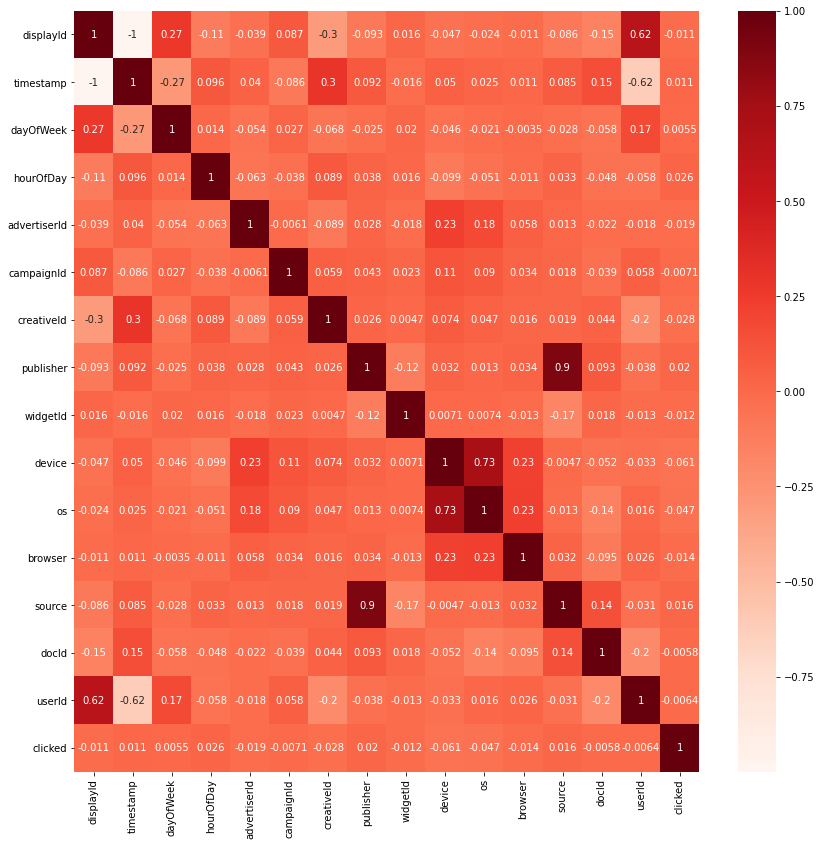

In [ ]:
cor = df_train.corr()
plt.figure(figsize=(14,14))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<div dir='rtl'>
همانطور که بوضوح نیز دیده می‌شود همبستگی‌ گروه‌های زیر بسیار زیاد است و یکی آز هر گروه دوتایی را حذف می‌کنیم:
<br>
(timestamp, display) , (source, publisher), (os, device)
<br>
البته display , timestamp
کلا در دیتاها یکتا هستند و ارزش خاصی ندارند پس جفتشان را حذف می‌کنیم.
</div>

In [ ]:
drop_columns = ['timestamp', 'publisher','os', 'displayId']
df_drop_downsampled = df_downsampled.drop(columns=drop_columns, axis=1)
df_train = df_train.drop(columns=drop_columns, axis=1)
# df_drop_upsampled = df_upsampled.drop(columns=drop_columns, axis=1)


***Down Sample Evaluation***

***Before dropping***

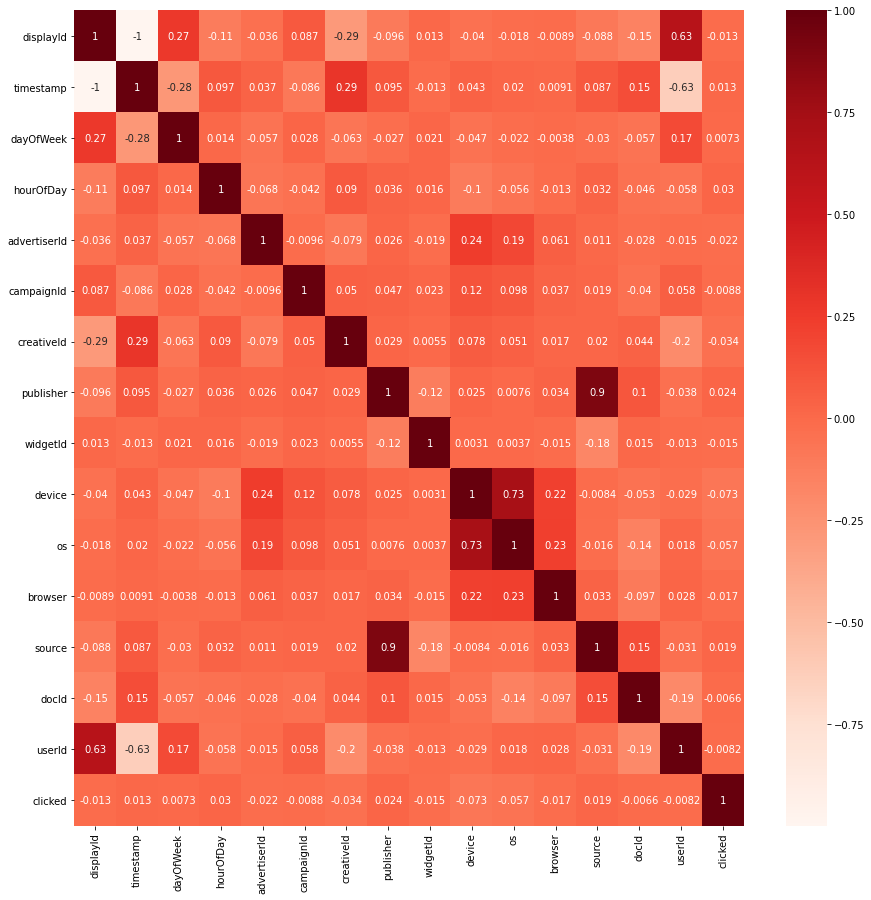

In [ ]:
cor = df_downsampled.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**After dropping**

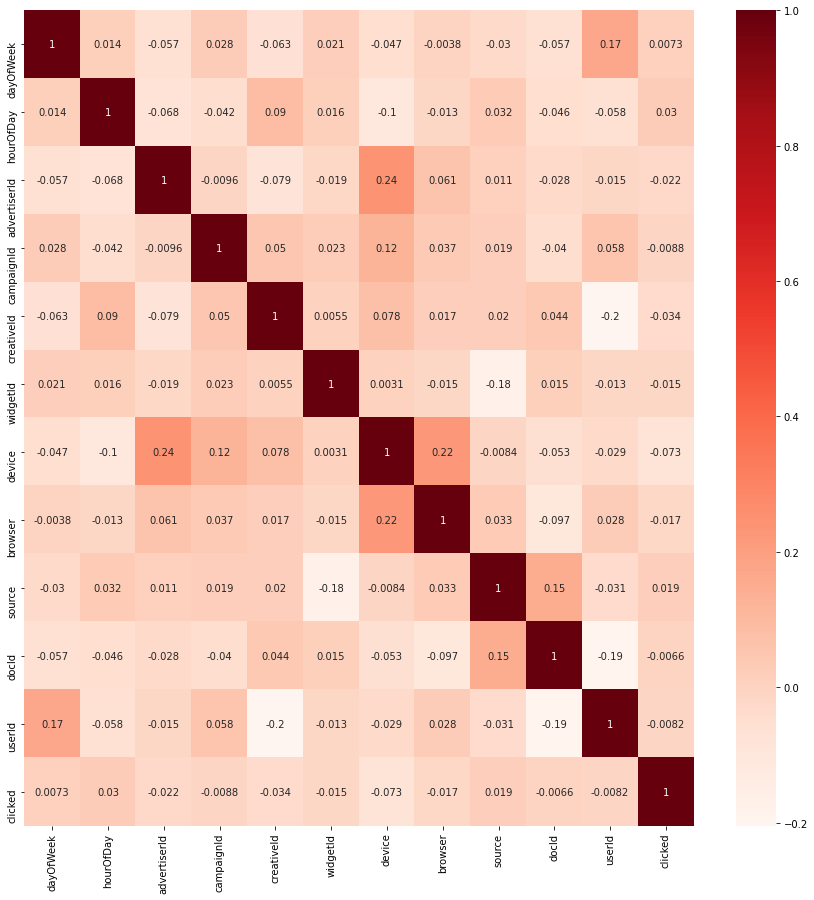

In [ ]:
cor = df_drop_downsampled.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()



---



***Up sample Evaluation***

***Before dropping columns***

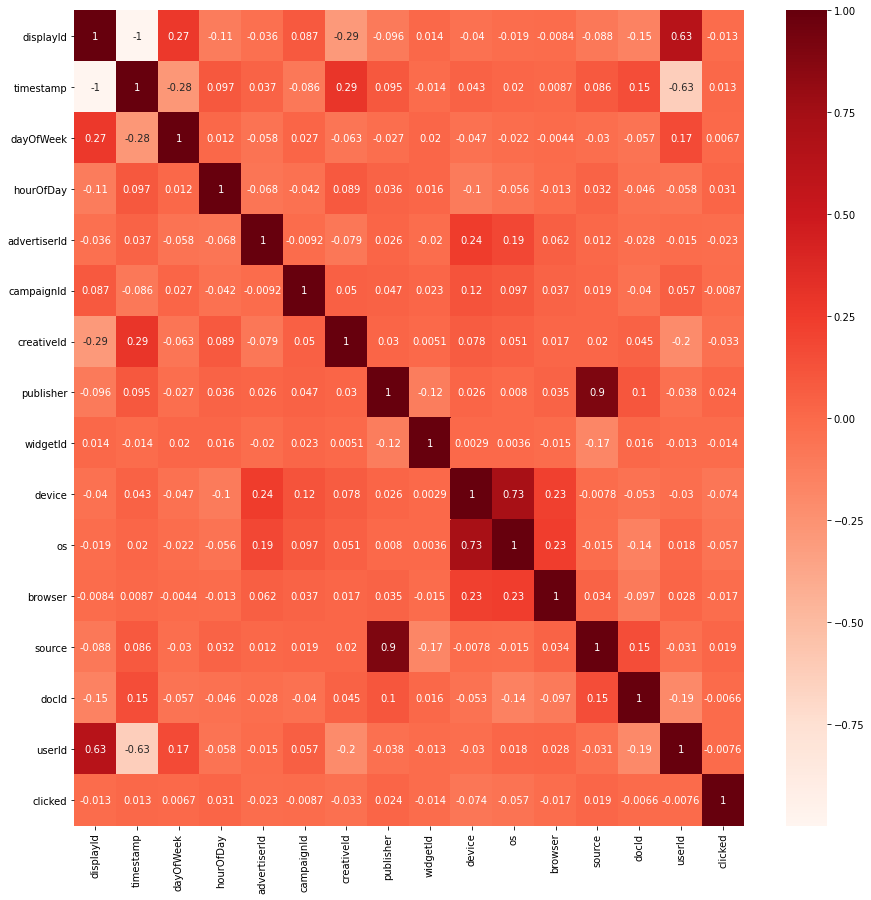

In [ ]:
# cor = df_upsampled.corr()
# plt.figure(figsize=(15,15))
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

***After dropping columns***

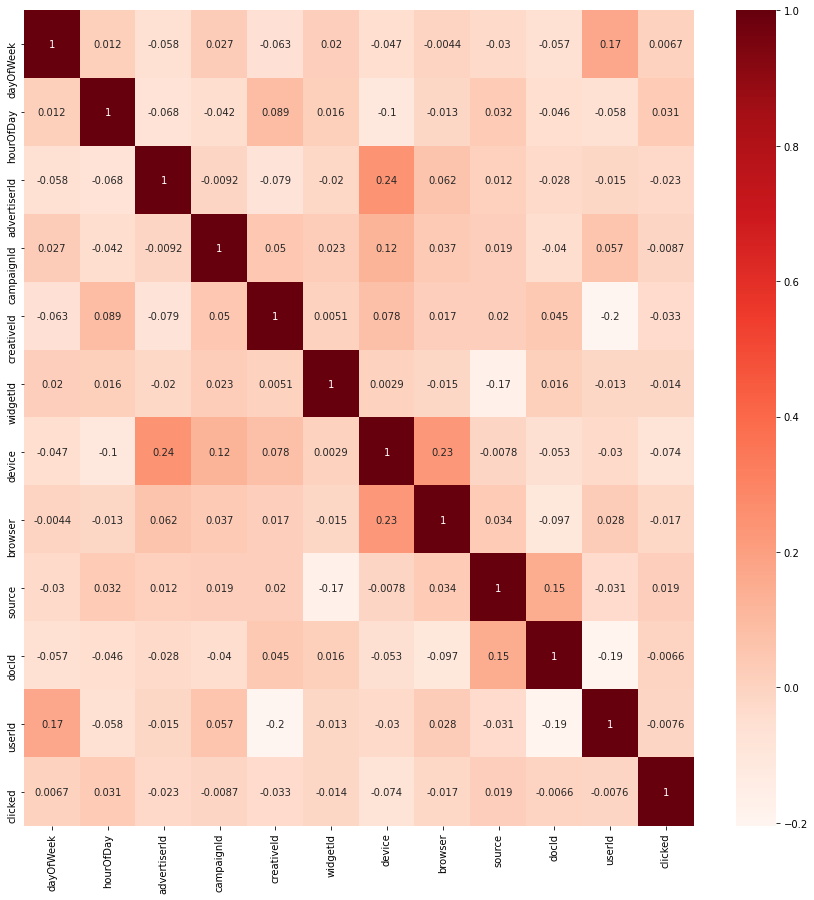

In [ ]:
# cor = df_drop_upsampled.corr()
# plt.figure(figsize=(15,15))
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

<div dir='rtl'>
همانطور که ‌می‌بینید دیگر همبستگی زیادی در میان فیچر‌ها وجود دارد ( یکسری همبستگی وجود دارد که باتوجه به تعریفی که ما از فیچر‌ها می‌دانیم وجود آنقدر همبستگی میان‌ آنها منطقی و مورد نیاز است برای همین ساده‌ سازی بیشتری انجام نمی‌دهیم.)
</div>

***Drop from test set too***

In [ ]:
df_drop_test = df_real_test.drop(columns=drop_columns, axis=1)

# ***Check columns***

<div dir='rtl'>
در این بخش می‌خواهیم بخشی از دیتا را به صورت افقی برش دهیم که دارای دیتا مهمی باشد.
<br>
منطق این بخش این است که مثلا وقتی یک یوزر یا یک صفحه یا هر فیچر یکبار در دیتاست وجود داشته باشد یعنی کاربری وجود داشته باشد که تنها یکبار صفحه‌ای کلیک کرده باشد و یا صفحه‌ای باشد که تنها یکبار کلیلک شده باشد به وضوح این بخش داده از نظر ارزش یادگیری کاملا بیهوده هستند زیرا هیچ اطالاعات یکسان و مشترکی میان این‌داده‌ها و دیگر داده ‌ها وجود ندارد و در روش ‌های FM نیز که ما بر اساس mutual information تصمیمات و یادگیری را انجام می‌دهیم نامفید واقع می‌شوند.
<br>
اما در مورد این بخش باید گفت که دو متود با نام‌های present و betterView را پیاده کرده‌ایم که اولی به ما CDF و PDF داده‌ها نسبت به یک فیچر را نشان می‌دهد و با مشخص کردن یک threshold می‌توان مشخص کرد تا چه تعداد از این داده‌ها نسبت به این فیچر دارای ارزش هستند (مثلا مشخص کنیم چندتا داده از میان داده‌های ما ۹۰٪ ارزش را دارند و از آنجا برش دهیم.)
<br>
متود betterView نیز برای رسم تعدادی از مهمترین داده‌ها در هر ویژگی بکار می‌رود.
</div>

In [ ]:
def present(df, column_name, percent, raito):
    data = df[column_name].value_counts()
    
    z = list(data)
    z = np.array(z)

    n = len(z)
    print("count of unique", column_name, "in data frame:", str(n))

    total = sum(z)
    cdf = np.cumsum(z)/total
    pdf = z/total

    threshold = 0
    for i in range(n):
        if cdf[i] >= percent:
            threshold = i
            break

    threshold_pdf = 0
    for i in range(n):
        if pdf[i] <= raito * pdf[0]:
            threshold_pdf = i
            break

    print('count of usefull', column_name, "in data frame:", threshold)
    print('count of repeats of first usefull data:', z[0])
    print('count of repeats of last usefull data:', z[threshold])
    print('pdf threshold index:',threshold_pdf)
    print('pdf threshold count of repeat:', z[threshold_pdf])


    fig, axs = plt.subplots(1,2, figsize=(20, 5))
    axs[0].step(range(0,len(z)), pdf)
    axs[0].set_title("PDF", fontsize = 30, pad = 20)
    # axs[0].xaxis.set_label_position('bottom')
    axs[1].step(range(0,len(z)), cdf)
    axs[1].set_title("CDF", fontsize = 30)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    fig.suptitle(column_name, fontsize = 40)

    plt.show()

def betterView(df, column_name, count):
    z = df_downsampled[column_name].value_counts()[:count]

    z = list(z)
    z = np.array(z)
    n = len(z)

    total = sum(z)
    cdf = np.cumsum(z)/total
    pdf = z/total

    plt.step(range(0,len(z)), pdf)
    plt.show()
    print(z)   

***Plot per feature for Down sampled dataframe***

***userId***

count of unique userId in data frame: 669248
count of usefull userId in data frame: 500811
count of repeats of first usefull data: 691
count of repeats of last usefull data: 1
pdf threshold index: 206
pdf threshold count of repeat: 34


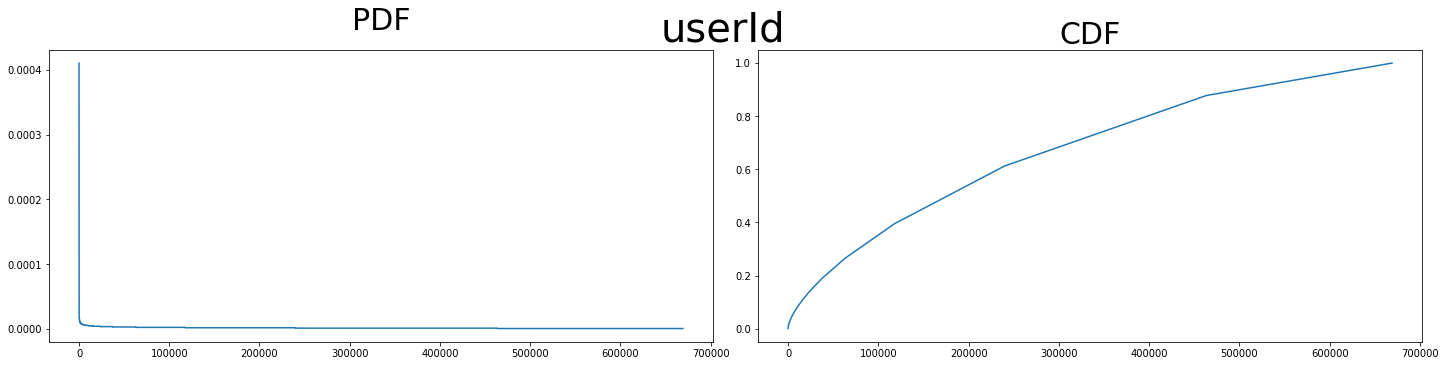

In [ ]:
present(df_drop_downsampled, 'userId',0.9, 0.05)

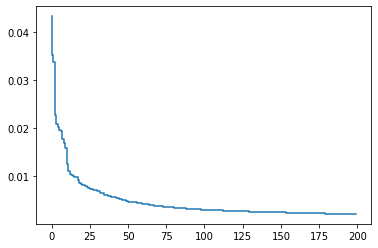

[691 561 538 362 334 322 312 309 285 272 254 201 177 167 165 162 158 156
 146 137 135 130 130 126 124 120 118 117 116 114 114 112 110 105 104  99
  98  97  96  94  92  91  90  89  87  85  85  81  81  80  77  76  76  74
  74  74  73  71  71  70  69  69  69  69  67  66  64  63  62  61  61  61
  60  60  59  59  58  58  57  57  57  55  55  55  55  54  54  54  53  52
  52  51  51  51  50  50  50  50  50  49  49  49  48  48  48  48  48  47
  47  47  47  47  47  46  46  46  45  45  45  45  45  45  45  44  44  44
  44  44  44  44  43  43  43  43  42  42  42  42  42  42  42  42  42  41
  41  41  41  41  41  41  40  40  40  40  39  39  39  39  39  39  39  39
  39  38  38  38  38  38  38  38  37  37  37  37  37  37  37  37  37  37
  36  36  36  36  36  36  36  36  36  36  36  36  35  35  35  35  35  35
  35  35]


In [ ]:
betterView(df_drop_downsampled, 'userId', 200)

***docId***

count of unique docId in data frame: 156623
count of usefull docId in data frame: 65408
count of repeats of first usefull data: 26445
count of repeats of last usefull data: 3
pdf threshold index: 57
pdf threshold count of repeat: 1307


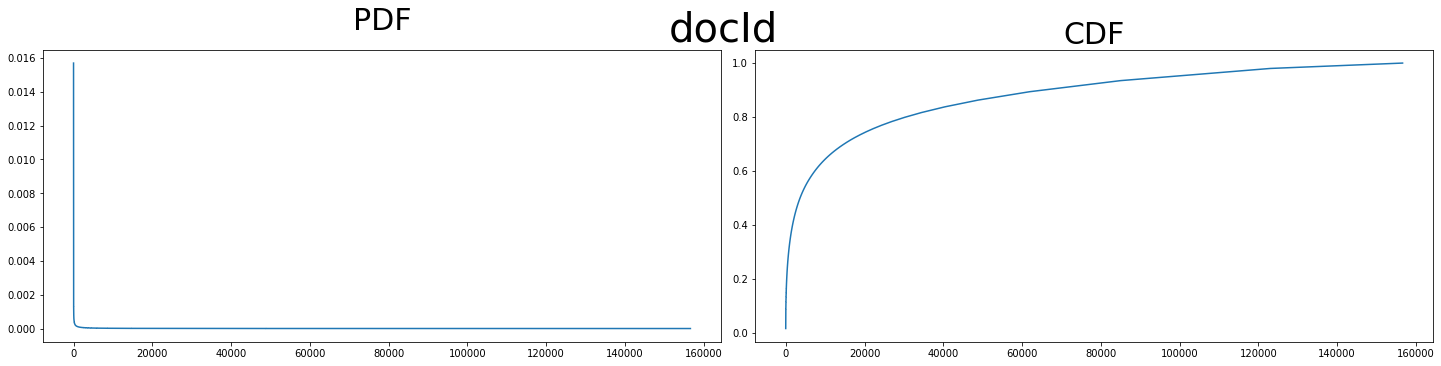

In [ ]:
present(df_drop_downsampled, 'docId',0.9, 0.05)

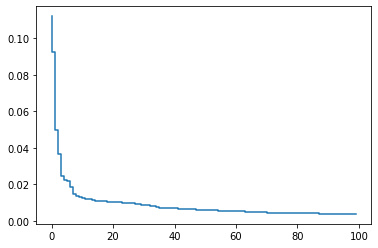

[26445 21769 11765  8627  5815  5353  5111  4399  3533  3225  3055  2971
  2903  2831  2773  2644  2632  2589  2583  2502  2484  2472  2467  2449
  2375  2336  2323  2309  2166  2154  2116  2019  2013  1973  1884  1774
  1729  1710  1661  1650  1631  1614  1603  1567  1536  1508  1507  1490
  1444  1429  1418  1412  1399  1373  1365  1350  1331  1307  1300  1294
  1249  1249  1247  1232  1226  1170  1150  1148  1144  1129  1107  1073
  1071  1069  1058  1057  1028  1020  1018  1016  1004   991   985   985
   976   972   971   969   962   959   958   952   952   951   937   935
   930   922   915   914]


In [ ]:
betterView(df_drop_downsampled, 'docId', 100)

***creativeId***

count of unique creativeId in data frame: 2665
count of usefull creativeId in data frame: 811
count of repeats of first usefull data: 39264
count of repeats of last usefull data: 344
pdf threshold index: 175
pdf threshold count of repeat: 1962


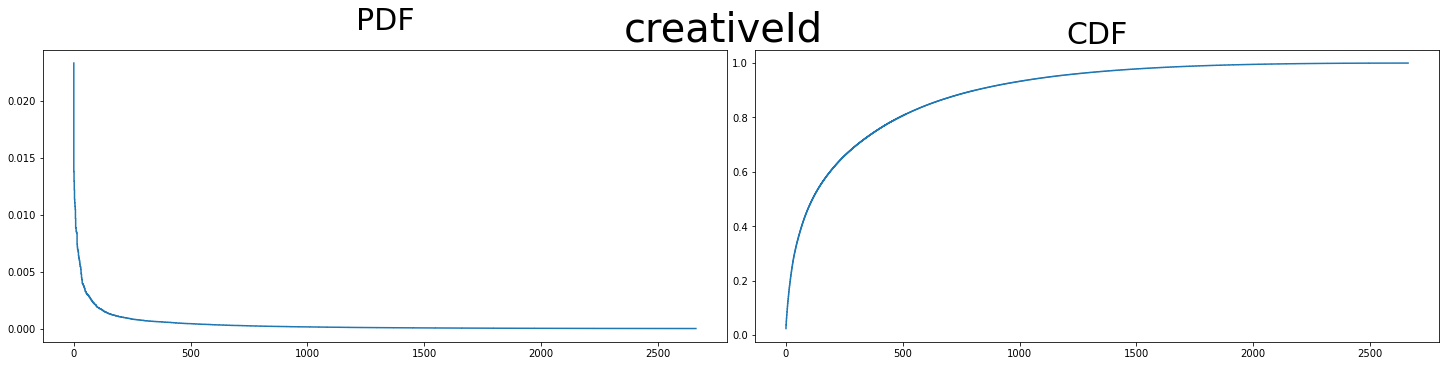

In [ ]:
present(df_drop_downsampled, 'creativeId',0.9, 0.05)

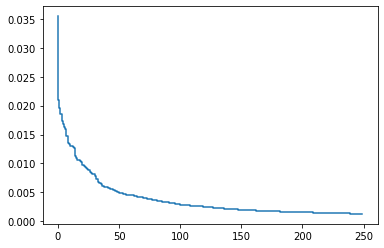

[39264 23218 21782 20524 19103 18616 18060 17655 16268 14926 14879 14341
 14335 14154 14076 12496 12079 11713 11690 11452 11307 10781 10559 10394
 10192 10075  9787  9489  9229  9137  9057  8739  8155  8033  7548  7279
  7222  6750  6667  6614  6611  6480  6389  6308  6220  6109  6049  5905
  5815  5566  5557  5465  5454  5451  5236  5218  5134  5110  5099  4975
  4973  4973  4953  4879  4856  4794  4718  4682  4669  4600  4584  4500
  4381  4379  4335  4219  4216  4168  4143  4094  3993  3971  3957  3880
  3805  3790  3775  3774  3710  3600  3596  3596  3557  3527  3511  3484
  3424  3336  3297  3281  3230  3153  3140  3129  3125  3117  3082  3066
  3040  3005  2974  2943  2932  2930  2917  2914  2908  2854  2827  2824
  2803  2796  2767  2733  2717  2690  2633  2631  2602  2592  2525  2517
  2515  2498  2497  2471  2454  2431  2423  2405  2402  2361  2355  2351
  2308  2307  2305  2250  2222  2221  2215  2209  2206  2182  2177  2175
  2158  2134  2124  2114  2101  2093  2055  2050  2

In [ ]:
betterView(df_drop_downsampled, 'creativeId', 250)

***campaignId***

count of unique campaignId in data frame: 474
count of usefull campaignId in data frame: 182
count of repeats of first usefull data: 56767
count of repeats of last usefull data: 1779
pdf threshold index: 135
pdf threshold count of repeat: 2819


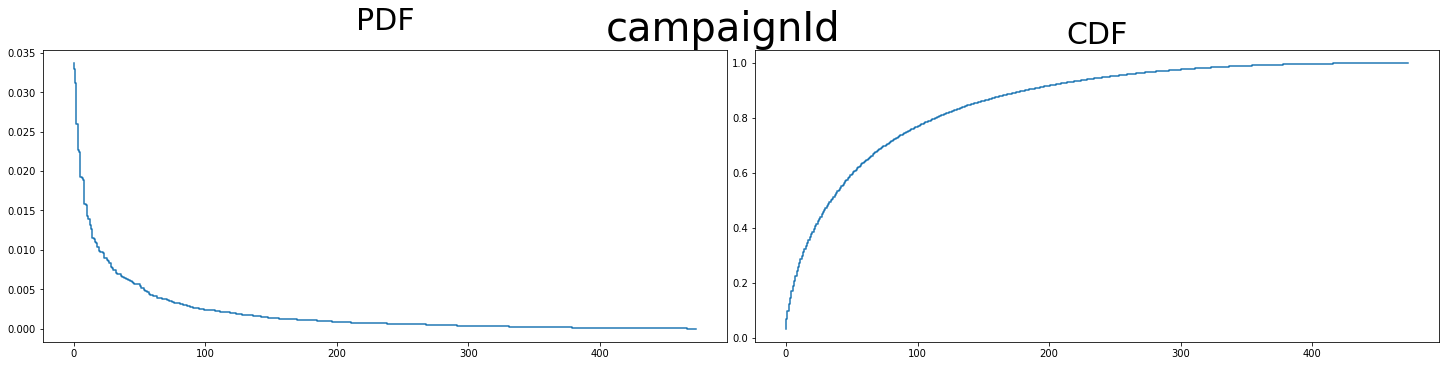

In [ ]:
present(df_drop_downsampled, 'campaignId', 0.9, 0.05)

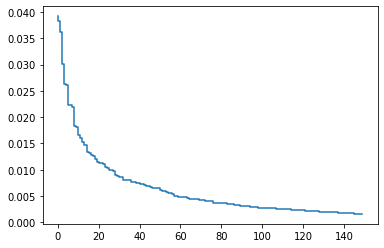

[56767 55466 52472 43638 38174 37812 32386 32251 31832 26629 26358 24016
 23347 22199 21290 19394 19103 18520 18194 17339 16540 16471 16443 16222
 15175 15048 14551 14335 14089 13144 12914 12593 12475 11777 11690 11584
 11563 11248 11041 10796 10755 10569 10464 10406 10162  9978  9709  9599
  9441  9428  9426  9057  8729  8613  8294  8009  8006  7858  7366  7238
  7098  6971  6960  6951  6625  6516  6440  6426  6379  6338  6304  6251
  6048  5977  5954  5948  5778  5463  5463  5454  5451  5412  5231  5210
  5134  5097  4966  4877  4796  4698  4621  4501  4461  4442  4389  4353
  4208  4169  4145  4073  4069  3971  3917  3911  3896  3889  3886  3869
  3809  3749  3666  3663  3637  3606  3580  3552  3527  3510  3481  3460
  3423  3408  3219  3215  3179  3152  3140  3129  3074  2994  2960  2946
  2924  2850  2846  2819  2819  2741  2706  2657  2633  2604  2578  2540
  2539  2499  2418  2406  2361  2341]


In [ ]:
betterView(df_drop_downsampled, 'campaignId', 150)

***advertiserId***

count of unique advertiserId in data frame: 200
count of usefull advertiserId in data frame: 60
count of repeats of first usefull data: 78673
count of repeats of last usefull data: 4966
pdf threshold index: 67
pdf threshold count of repeat: 3929


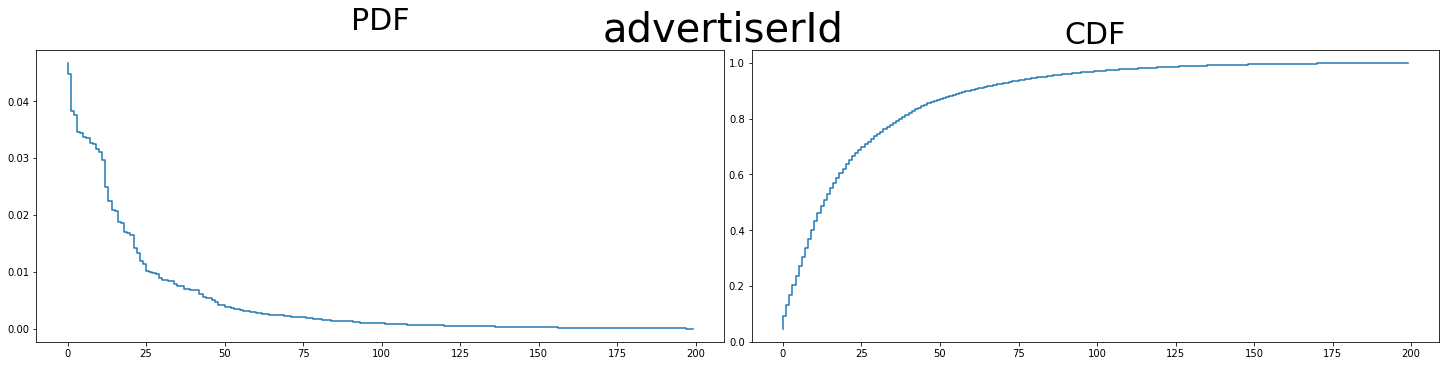

In [ ]:
present(df_drop_downsampled, 'advertiserId', 0.9, 0.05)

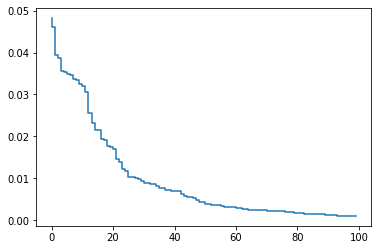

[78673 75312 64454 63236 58122 57884 56767 56441 55085 54561 53244 52284
 50072 41871 37812 35249 34963 31728 31338 28727 28458 27679 24016 22484
 20098 19202 16987 16646 16445 16093 15078 14538 14375 14208 14051 13215
 12569 12475 11777 11690 11384 11333 11325 10153  9266  9003  8974  8565
  7759  7071  6971  6304  6287  5969  5858  5709  5454  5210  5073  5043
  4966  4636  4621  4442  4353  4108  4025  3929  3917  3908  3833  3673
  3579  3552  3473  3423  3367  3140  3132  2985  2819  2766  2618  2561
  2525  2341  2244  2232  2222  2216  2136  2135  1841  1832  1792  1743
  1712  1683  1648  1645]


In [ ]:
betterView(df_drop_downsampled, 'advertiserId', 100)

***widgetId***

count of unique widgetId in data frame: 1165
count of usefull widgetId in data frame: 164
count of repeats of first usefull data: 91678
count of repeats of last usefull data: 1561
pdf threshold index: 85
pdf threshold count of repeat: 4565


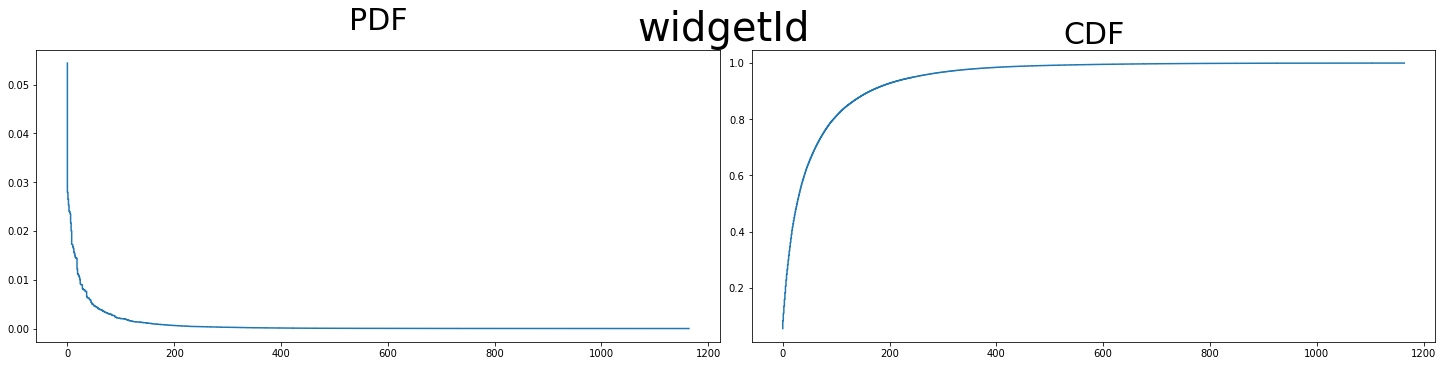

In [ ]:
present(df_drop_downsampled, 'widgetId', 0.9, 0.05)

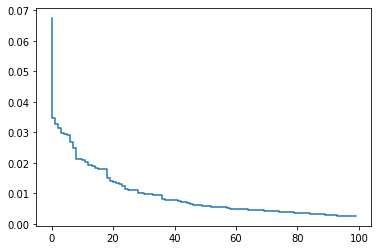

[91678 47034 44642 42612 40504 40246 39621 36440 33728 29062 29028 28225
 27720 26363 25948 25037 24427 24376 24250 20575 18915 18627 18267 17759
 16933 15450 15134 15119 15116 13770 13604 13391 13386 13265 12847 12838
 12762 11074 10597 10586 10573 10404 10100  9892  9839  9155  8849  8446
  8375  8328  7934  7871  7703  7646  7512  7478  7267  7245  7024  6768
  6764  6648  6533  6505  6473  6341  6321  6014  5964  5919  5739  5739
  5517  5499  5479  5415  5229  5162  5075  5056  5001  4951  4888  4858
  4602  4565  4494  4480  4460  4425  3968  3932  3857  3771  3641  3633
  3612  3609  3583  3489]


In [ ]:
betterView(df_drop_downsampled, 'widgetId', 100)

***sourceId***

count of unique source in data frame: 2868
count of usefull source in data frame: 91
count of repeats of first usefull data: 91667
count of repeats of last usefull data: 2317
pdf threshold index: 57
pdf threshold count of repeat: 4494


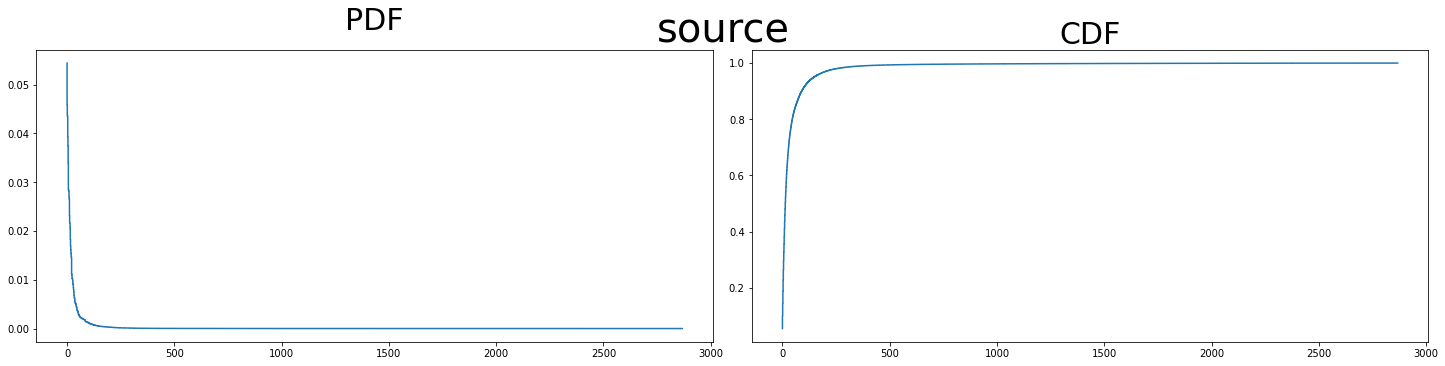

In [ ]:
present(df_drop_downsampled, 'source', 0.9, 0.05)

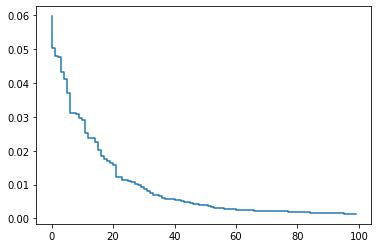

[91667 77342 73737 73138 66170 63057 57052 47918 47628 47389 45392 44722
 38957 36476 36440 34575 30822 28478 27142 25948 25055 24376 18873 18571
 17356 17220 17168 16429 15419 15233 14208 13386 12666 11443 10620 10586
 10404  9411  8849  8804  8790  8508  8363  7934  7652  7267  7064  6498
  6332  6139  5919  5917  5661  5001  4958  4956  4683  4494  4280  4275
  4194  3944  3893  3867  3866  3857  3612  3583  3581  3530  3489  3420
  3394  3391  3390  3387  3356  3188  3153  3135  3104  3080  3047  2968
  2891  2622  2533  2500  2413  2352  2321  2317  2317  2272  2271  2252
  2220  2123  2062  2058]


In [ ]:
betterView(df_drop_downsampled, 'source', 100)



---



---


***Plot per feature for Up sampled dataframe***

***userId***

In [ ]:
# present(df_drop_upsampled, 'userId',0.9, 0.05)

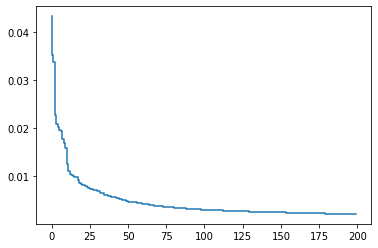

[691 561 538 362 334 322 312 309 285 272 254 201 177 167 165 162 158 156
 146 137 135 130 130 126 124 120 118 117 116 114 114 112 110 105 104  99
  98  97  96  94  92  91  90  89  87  85  85  81  81  80  77  76  76  74
  74  74  73  71  71  70  69  69  69  69  67  66  64  63  62  61  61  61
  60  60  59  59  58  58  57  57  57  55  55  55  55  54  54  54  53  52
  52  51  51  51  50  50  50  50  50  49  49  49  48  48  48  48  48  47
  47  47  47  47  47  46  46  46  45  45  45  45  45  45  45  44  44  44
  44  44  44  44  43  43  43  43  42  42  42  42  42  42  42  42  42  41
  41  41  41  41  41  41  40  40  40  40  39  39  39  39  39  39  39  39
  39  38  38  38  38  38  38  38  37  37  37  37  37  37  37  37  37  37
  36  36  36  36  36  36  36  36  36  36  36  36  35  35  35  35  35  35
  35  35]


In [ ]:
# betterView(df_drop_upsampled, 'userId', 200)

***docId***

count of unique docId in data frame: 156623
count of usefull docId in data frame: 67595
count of repeats of first usefull data: 91578
count of repeats of last usefull data: 11
pdf threshold index: 57
pdf threshold count of repeat: 4463


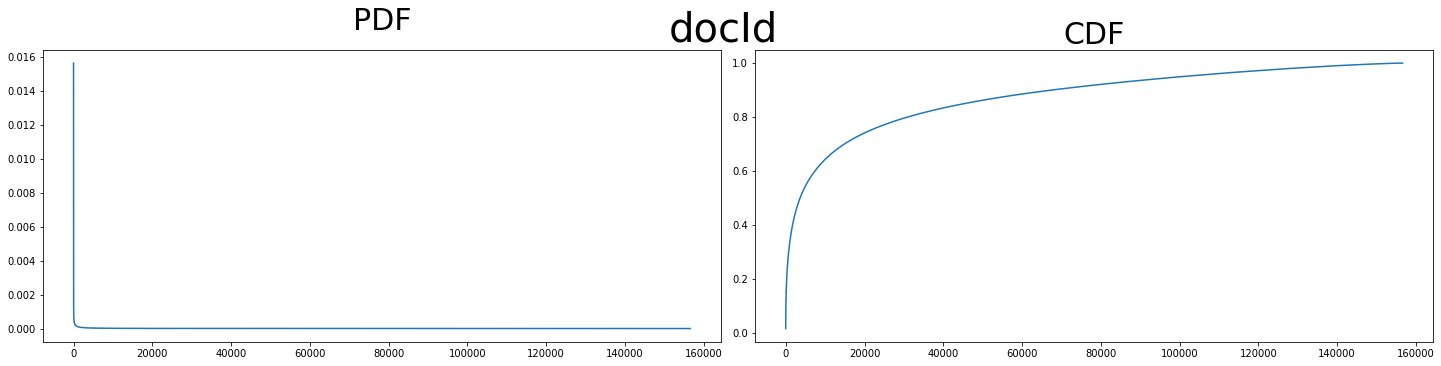

In [ ]:
# present(df_drop_upsampled, 'docId',0.9, 0.05)

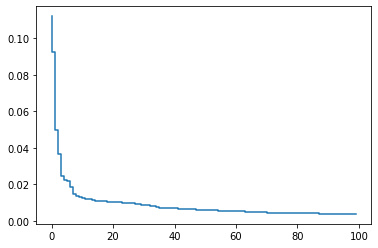

[26445 21769 11765  8627  5815  5353  5111  4399  3533  3225  3055  2971
  2903  2831  2773  2644  2632  2589  2583  2502  2484  2472  2467  2449
  2375  2336  2323  2309  2166  2154  2116  2019  2013  1973  1884  1774
  1729  1710  1661  1650  1631  1614  1603  1567  1536  1508  1507  1490
  1444  1429  1418  1412  1399  1373  1365  1350  1331  1307  1300  1294
  1249  1249  1247  1232  1226  1170  1150  1148  1144  1129  1107  1073
  1071  1069  1058  1057  1028  1020  1018  1016  1004   991   985   985
   976   972   971   969   962   959   958   952   952   951   937   935
   930   922   915   914]


In [ ]:
# betterView(df_drop_upsampled, 'docId', 100)

***creativeId***

count of unique creativeId in data frame: 2696
count of usefull creativeId in data frame: 811
count of repeats of first usefull data: 136287
count of repeats of last usefull data: 1206
pdf threshold index: 174
pdf threshold count of repeat: 6781


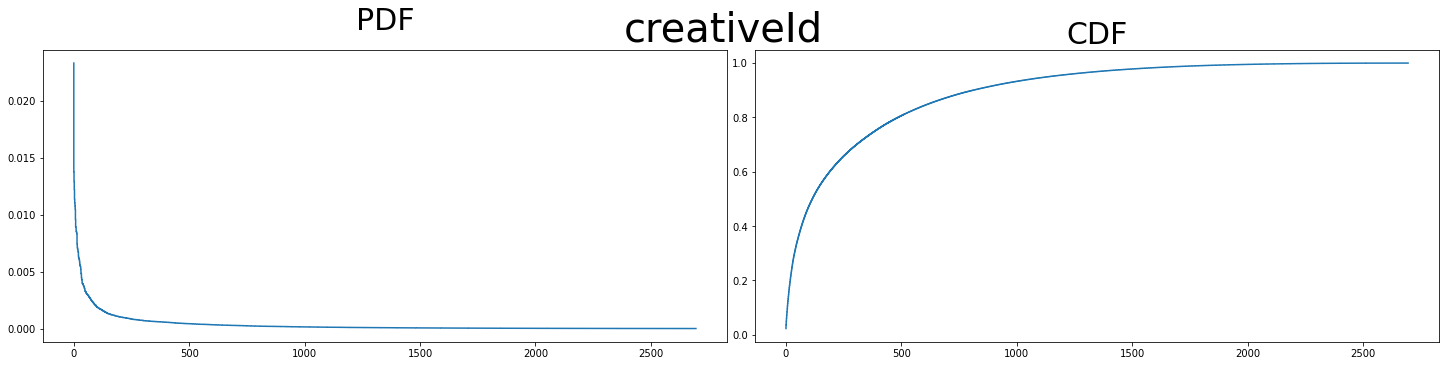

In [ ]:
# present(df_drop_upsampled, 'creativeId',0.9, 0.05)

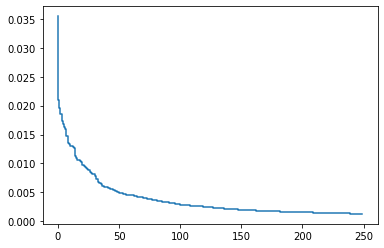

[39264 23218 21782 20524 19103 18616 18060 17655 16268 14926 14879 14341
 14335 14154 14076 12496 12079 11713 11690 11452 11307 10781 10559 10394
 10192 10075  9787  9489  9229  9137  9057  8739  8155  8033  7548  7279
  7222  6750  6667  6614  6611  6480  6389  6308  6220  6109  6049  5905
  5815  5566  5557  5465  5454  5451  5236  5218  5134  5110  5099  4975
  4973  4973  4953  4879  4856  4794  4718  4682  4669  4600  4584  4500
  4381  4379  4335  4219  4216  4168  4143  4094  3993  3971  3957  3880
  3805  3790  3775  3774  3710  3600  3596  3596  3557  3527  3511  3484
  3424  3336  3297  3281  3230  3153  3140  3129  3125  3117  3082  3066
  3040  3005  2974  2943  2932  2930  2917  2914  2908  2854  2827  2824
  2803  2796  2767  2733  2717  2690  2633  2631  2602  2592  2525  2517
  2515  2498  2497  2471  2454  2431  2423  2405  2402  2361  2355  2351
  2308  2307  2305  2250  2222  2221  2215  2209  2206  2182  2177  2175
  2158  2134  2124  2114  2101  2093  2055  2050  2

In [ ]:
# betterView(df_drop_upsampled, 'creativeId', 250)

***campaignId***

count of unique campaignId in data frame: 474
count of usefull campaignId in data frame: 183
count of repeats of first usefull data: 197427
count of repeats of last usefull data: 6047
pdf threshold index: 134
pdf threshold count of repeat: 9845


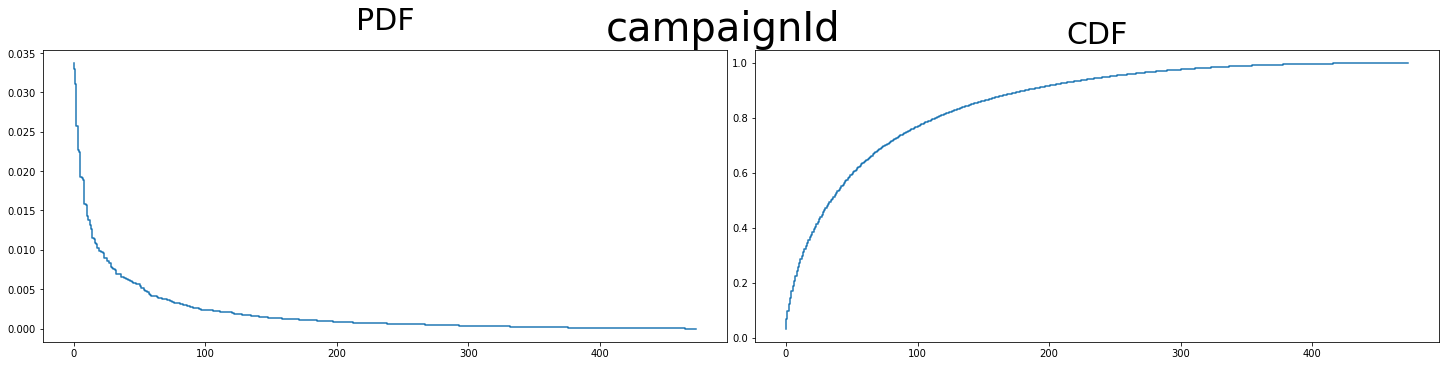

In [ ]:
# present(df_drop_upsampled, 'campaignId', 0.9, 0.05)

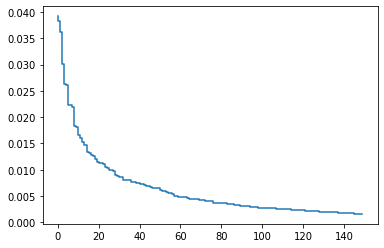

[56767 55466 52472 43638 38174 37812 32386 32251 31832 26629 26358 24016
 23347 22199 21290 19394 19103 18520 18194 17339 16540 16471 16443 16222
 15175 15048 14551 14335 14089 13144 12914 12593 12475 11777 11690 11584
 11563 11248 11041 10796 10755 10569 10464 10406 10162  9978  9709  9599
  9441  9428  9426  9057  8729  8613  8294  8009  8006  7858  7366  7238
  7098  6971  6960  6951  6625  6516  6440  6426  6379  6338  6304  6251
  6048  5977  5954  5948  5778  5463  5463  5454  5451  5412  5231  5210
  5134  5097  4966  4877  4796  4698  4621  4501  4461  4442  4389  4353
  4208  4169  4145  4073  4069  3971  3917  3911  3896  3889  3886  3869
  3809  3749  3666  3663  3637  3606  3580  3552  3527  3510  3481  3460
  3423  3408  3219  3215  3179  3152  3140  3129  3074  2994  2960  2946
  2924  2850  2846  2819  2819  2741  2706  2657  2633  2604  2578  2540
  2539  2499  2418  2406  2361  2341]


In [ ]:
# betterView(df_drop_upsampled, 'campaignId', 150)

***advertiserId***

count of unique advertiserId in data frame: 200
count of usefull advertiserId in data frame: 60
count of repeats of first usefull data: 273304
count of repeats of last usefull data: 17239
pdf threshold index: 67
pdf threshold count of repeat: 13656


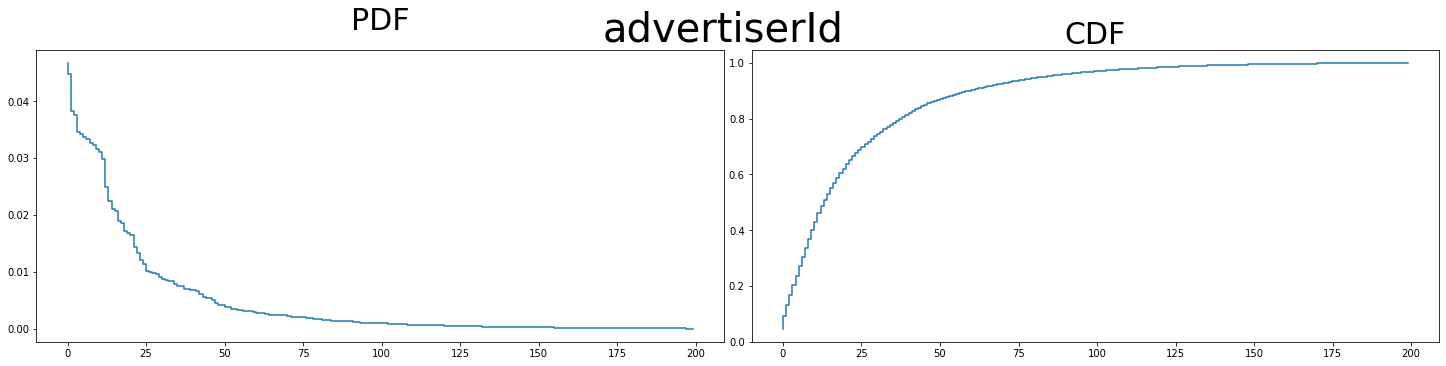

In [ ]:
# present(df_drop_upsampled, 'advertiserId', 0.9, 0.05)

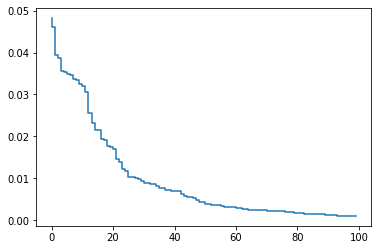

[78673 75312 64454 63236 58122 57884 56767 56441 55085 54561 53244 52284
 50072 41871 37812 35249 34963 31728 31338 28727 28458 27679 24016 22484
 20098 19202 16987 16646 16445 16093 15078 14538 14375 14208 14051 13215
 12569 12475 11777 11690 11384 11333 11325 10153  9266  9003  8974  8565
  7759  7071  6971  6304  6287  5969  5858  5709  5454  5210  5073  5043
  4966  4636  4621  4442  4353  4108  4025  3929  3917  3908  3833  3673
  3579  3552  3473  3423  3367  3140  3132  2985  2819  2766  2618  2561
  2525  2341  2244  2232  2222  2216  2136  2135  1841  1832  1792  1743
  1712  1683  1648  1645]


In [ ]:
# betterView(df_drop_upsampled, 'advertiserId', 100)

***widgetId***

count of unique widgetId in data frame: 1165
count of usefull widgetId in data frame: 164
count of repeats of first usefull data: 318807
count of repeats of last usefull data: 5439
pdf threshold index: 86
pdf threshold count of repeat: 15583


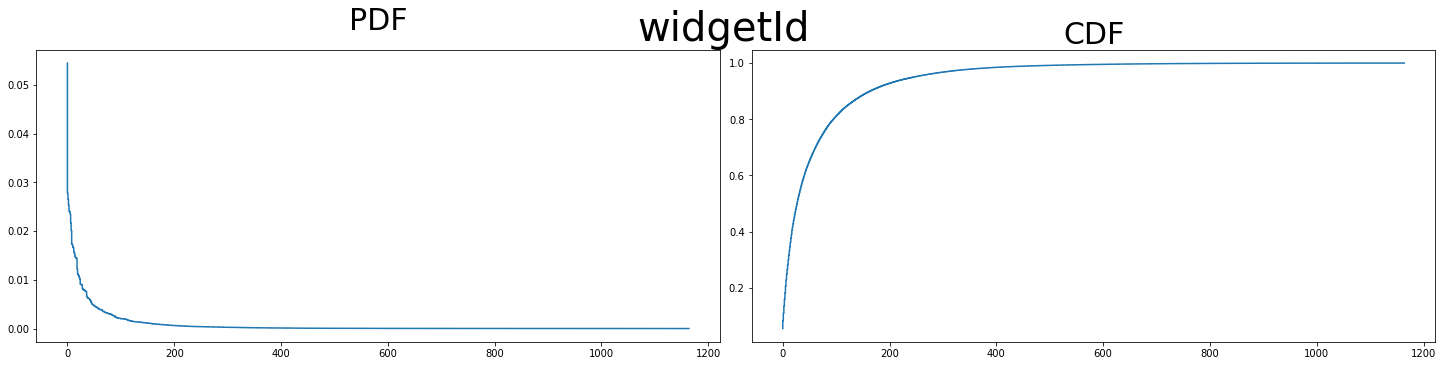

In [ ]:
# present(df_drop_upsampled, 'widgetId', 0.9, 0.05)

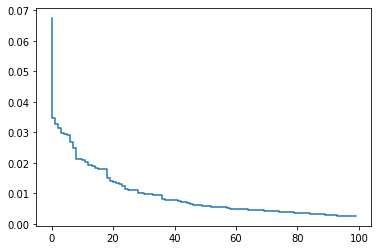

[91678 47034 44642 42612 40504 40246 39621 36440 33728 29062 29028 28225
 27720 26363 25948 25037 24427 24376 24250 20575 18915 18627 18267 17759
 16933 15450 15134 15119 15116 13770 13604 13391 13386 13265 12847 12838
 12762 11074 10597 10586 10573 10404 10100  9892  9839  9155  8849  8446
  8375  8328  7934  7871  7703  7646  7512  7478  7267  7245  7024  6768
  6764  6648  6533  6505  6473  6341  6321  6014  5964  5919  5739  5739
  5517  5499  5479  5415  5229  5162  5075  5056  5001  4951  4888  4858
  4602  4565  4494  4480  4460  4425  3968  3932  3857  3771  3641  3633
  3612  3609  3583  3489]


In [ ]:
# betterView(df_drop_upsampled, 'widgetId', 100)

***sourceId***

count of unique source in data frame: 2868
count of usefull source in data frame: 91
count of repeats of first usefull data: 318756
count of repeats of last usefull data: 8147
pdf threshold index: 57
pdf threshold count of repeat: 15366


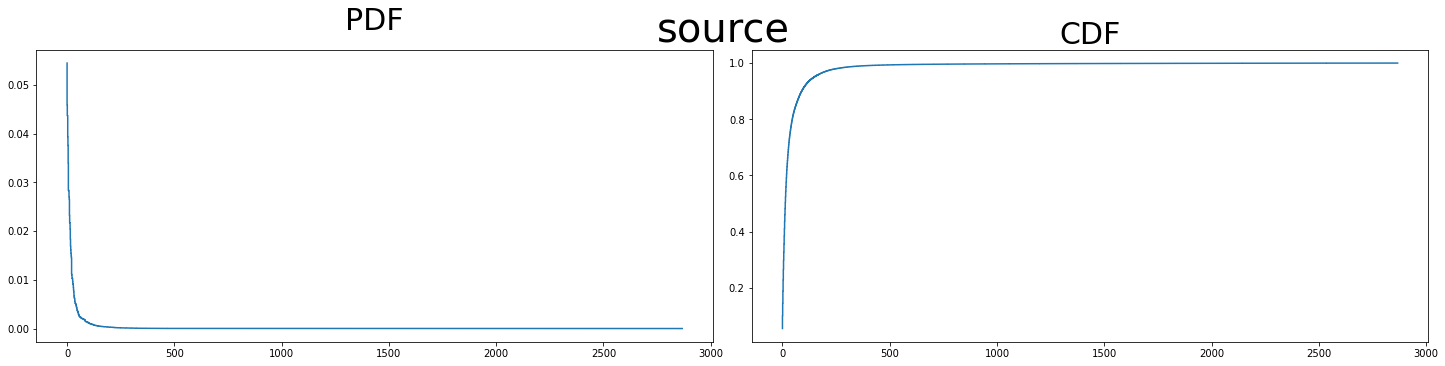

In [ ]:
# present(df_drop_upsampled, 'source', 0.9, 0.05)

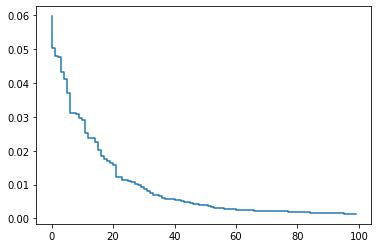

[91667 77342 73737 73138 66170 63057 57052 47918 47628 47389 45392 44722
 38957 36476 36440 34575 30822 28478 27142 25948 25055 24376 18873 18571
 17356 17220 17168 16429 15419 15233 14208 13386 12666 11443 10620 10586
 10404  9411  8849  8804  8790  8508  8363  7934  7652  7267  7064  6498
  6332  6139  5919  5917  5661  5001  4958  4956  4683  4494  4280  4275
  4194  3944  3893  3867  3866  3857  3612  3583  3581  3530  3489  3420
  3394  3391  3390  3387  3356  3188  3153  3135  3104  3080  3047  2968
  2891  2622  2533  2500  2413  2352  2321  2317  2317  2272  2271  2252
  2220  2123  2062  2058]


In [ ]:
# betterView(df_drop_upsampled, 'source', 100)

# **Drop rows**

<div dir='rtl'>
همانطور که مشاهده کردید، 
شکل pdf و cdf
در هردو روش down sample و up sample
تقریبا یک چیز است.
<br>
با توجه محاسبات بالا و نمودار‌هایی که در آوردیم سطرهای که دیتا ارزشمندی ندارند را از دیتا ترین حذف می‌کنیم.
</div>

In [ ]:
def drop_useless_row(df, column_name, threshold):
    condition = df[column_name].value_counts() >= threshold
    df_condition = pd.DataFrame(condition)
    df_condition = df_condition[df_condition[column_name] == True]
    return df[df[column_name].isin(df_condition.index)]

***Union of Data (on down sampled dataframe)***

In [ ]:
selectValueFeatures = ['userId', 'docId', 'creativeId', 'campaignId', 'advertiserId', 'widgetId', 'source']
selectValueCountAmount = [10, 1300, 2200, 3000, 4500,4500, 4500]

n = len(selectValueCountAmount)
dfs = []
for i in range(n):
    dfs.append(drop_useless_row(df_drop_downsampled, selectValueFeatures[i], selectValueCountAmount[i]))

cleaned_downsampled_df = pd.concat(dfs).drop_duplicates().reset_index(drop=True)
print(len(cleaned_downsampled_df))

1602326


In [ ]:
r = drop_useless_row(df_drop_downsampled, 'docId', 1300)
r

,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,widgetId,device,browser,source,docId,userId,clicked
1983551,3,11,5687,3082,5649,10068,0,0,45,7474560,1816340,0
2772439,0,7,9389,4499,6616,5620,0,0,5,2285483,756607,0
2776926,0,7,3137,5515,717,4981,1,0,5,2285483,1328084,0
1296834,1,9,1481,6341,5539,4981,0,0,5,2285483,2124415,0
517892,5,11,6578,7270,5477,13728,1,2,21,205,2489252,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3767884,3,23,5528,471,7116,10142,0,0,13,163,515999,1
3767950,3,23,5528,471,7173,8142,0,0,634,8116,697605,1
3768037,3,23,6795,2686,6560,5620,1,2,5,2285483,697546,1
3768250,3,23,3344,2669,5236,10142,0,0,13,163,697390,1


***Union of Data (on up sampled dataframe)***

<div dir='rtl'>
در زیر مجبور شدیم در مراحل مختلف جدا کنیم زیرا مموری لیمیت میخوردیم.
</div>

In [ ]:
# selectValueFeatures = ['userId', 'docId']
# selectValueCountAmount = [30, 1300]

# n = len(selectValueCountAmount)
# dfs = []
# for i in range(n):
#     dfs.append(drop_useless_row(df_drop_upsampled, selectValueFeatures[i], selectValueCountAmount[i]))

# cleaned_upsampled_df = pd.concat(dfs).drop_duplicates().reset_index(drop=True)
# print(len(cleaned_upsampled_df))

955090


In [ ]:
# selectValueFeatures = ['creativeId', 'campaignId']
# selectValueCountAmount = [2000, 3000]

# n = len(selectValueCountAmount)
# dfs = []
# for i in range(n):
#     dfs.append(drop_useless_row(df_drop_upsampled, selectValueFeatures[i], selectValueCountAmount[i]))

# cleaned_upsampled_df = pd.concat([cleaned_upsampled_df, *dfs]).drop_duplicates().reset_index(drop=True)
# print(len(cleaned_upsampled_df))

3385364


In [ ]:
# selectValueFeatures = ['advertiserId', 'widgetId', 'source']
# selectValueCountAmount = [4000,4500, 4500]
# dfs = []
# n = len(selectValueCountAmount)
# for i in range(n):
#     dfs.append(drop_useless_row(df_drop_upsampled, selectValueFeatures[i], selectValueCountAmount[i]))
# concated_dfs = pd.concat(dfs).drop_duplicates().reset_index(drop=True)


In [ ]:
# cleaned_upsampled_df = pd.concat([cleaned_upsampled_df, concated_dfs]).drop_duplicates().reset_index(drop=True)
# print(len(cleaned_upsampled_df))

3465012


# **choosing one mehtod**


<div dir='rtl'>
اندکی که جلوتر برویم با توجه به مشکلاتی که در مراحل اجرا svm و دیگر روش‌ها برایمان رخ می‌دهد نتیجه گیری می‌کنیم که روش down sample از نظر اینکه تعداد داده تقریبا نصف روش دیگر است خیلی بهتر عمل می‌کند و به همین دلیل و البته نزدیکی دقت اندازه‌گیری شده در روش logistic regression و همچنین مموری لیمیت شدید در مورد ماتریس‌های اسپارس از این روش در ادامه استفاده می‌کنیم.
</div>

# ***Sparse Matrix***

<div dir='rtl'>
در این مرحله باید جوری داده را کتگوریکال کنیم 
(one hot)
که همه کتگوری‌های ممکن هم در داده ترین و هم در داده تست وجود داشته باشد. برای این موضوع این دو داده را کنار هم میریزیم و اسپارس می‌کنیم.
بعدش از سطر x به بعد که برای 
test.csv
بود را جدا کرده و کنار می‌گذاریم اینجوری همه داده‌ها یک شکل دارند و می‌توان ران کرد.
برای این مورد استفاده شد
نکته مهم این است این پروسه زمان‌بر است و یکبار کامل ران شد ولی متاسفانه خروجی ها پرید و من دوباره از همه ران‌تایم ران گرفتم و حالا برای این کار کداشو کامنت کردم. 
بخوایم روی test.csv خروجی بگیریم باید اینارو ران کنیم خلاصه 
</div>


[لینک استفاده‌شده در توضیحات بالا](https://medium.com/@vaibhavshukla182/how-to-solve-mismatch-in-train-and-test-set-after-categorical-encoding-8320ed03552f)

In [ ]:
# y_csr = cleaned_downsampled_df['clicked']
# cleaned_downsampled_df = cleaned_downsampled_df.drop(columns=['clicked'])

In [ ]:
# df = pd.concat([cleaned_downsampled_df, df_drop_test], axis=0)

In [ ]:
print(y_csr.shape)
print(cleaned_downsampled_df.shape)
print(df_drop_test.shape)
print(df.shape)

(1602326,)
(1602326, 12)
(1072876, 11)
(2675202, 11)


In [ ]:
from scipy.sparse import lil_matrix
import numpy as np

def data_frame_to_scipy_sparse_matrix(df):
    """
    Converts a sparse pandas data frame to sparse scipy csr_matrix.
    :param df: pandas data frame
    :return: csr_matrix
    """
    arr = lil_matrix(df.shape, dtype=np.float32)
    for i, col in enumerate(df.columns):
        ix = df[col] != 0
        arr[np.where(ix), i] = 1

    return arr.tocsr()

def get_csr_memory_usage(matrix):
    mem = (matrix.data.nbytes + matrix.indptr.nbytes + matrix.indices.nbytes) * 0.000001
    print("Memory usage is " + str(mem) + " MB")


In [ ]:
# create onehot dataframe
onehot_features = ['userId', 'docId', 'creativeId', 'campaignId', 'advertiserId', 'widgetId', 'source', 'dayOfWeek', 'hourOfDay', 'device', 'browser']
# df = pd.get_dummies(df, columns = onehot_features, sparse=True)

In [ ]:
onehot_features = ['userId', 'docId', 'creativeId', 'campaignId', 'advertiserId', 'widgetId', 'source', 'dayOfWeek', 'hourOfDay', 'device', 'browser']
df_onehot = pd.get_dummies(cleaned_downsampled_df, columns = onehot_features, sparse=True)

In [ ]:
# cleaned_downsampled_df one-hot format
# l = cleaned_downsampled_df.shape[0]
# final_train = df[:l]
# final_test = df[l:]

,userId_8,userId_22,userId_30,userId_44,userId_47,userId_48,userId_49,userId_51,userId_55,userId_60,userId_63,userId_70,userId_74,userId_79,userId_84,userId_86,userId_94,userId_101,userId_104,userId_106,userId_112,userId_113,userId_120,userId_121,userId_124,userId_126,userId_127,userId_130,userId_134,userId_136,userId_140,userId_143,userId_145,userId_150,userId_151,userId_157,userId_170,userId_175,userId_176,userId_177,...,browser_44,browser_45,browser_46,browser_47,browser_48,browser_49,browser_50,browser_51,browser_52,browser_53,browser_54,browser_56,browser_57,browser_59,browser_60,browser_61,browser_63,browser_64,browser_66,browser_69,browser_70,browser_71,browser_72,browser_74,browser_77,browser_78,browser_79,browser_80,browser_81,browser_83,browser_85,browser_87,browser_88,browser_90,browser_91,browser_93,browser_95,browser_97,browser_99,browser_102
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072871,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1072872,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1072873,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1072874,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X_csr = data_frame_to_scipy_sparse_matrix(final_train)
# X_csr_test = data_frame_to_scipy_sparse_matrix(final_test)

In [ ]:
# reformat test set to csr matrix
X_csr = data_frame_to_scipy_sparse_matrix(df_onehot)
y_csr = cleaned_downsampled_df['clicked']

<div dir='rtl'>
قبل از هرکاری اول داده‌های ترینی را به دو گروه ترین و تست تقسیم می‌کنیم </div>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_csr, y_csr, test_size=0.25, random_state=42)

In [ ]:
get_csr_memory_usage(X_train)
get_csr_memory_usage(X_test)

Memory usage is 110.560452 MB
Memory usage is 36.853547999999996 MB


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1201744, 830101)
(400582, 830101)


# ***توضیحات معیار‌ها***

***‫‪F1‬‬:***
<div dir='rtl'>
می‌توان به عنوان میانگین وزن‌دار precision و recall در نظر گرفت.
$$  2 \times \frac{(precision \times recall)}{(precision + recall)} $$
</div>


***cross-entropy loss:***
<div dir='rtl'>
این همان تابع خطایی است که در multinomial logistic regression و مشتقات دیگر آن و همجنین neural network استفاده می‌شود.
$$ L_{\log}(y, p) = -(y \log (p) + (1 - y) \log (1 - p)) $$
</div>

***‫‪AUC:‬‬***
<div dir='rtl'>
مساحت زیر نمودار Receiver Operating Characteristic Curve (ROC AUC)  را به کمک امتیاز prediction ها محاسبه می‌کند.
</div>

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, log_loss
from sklearn.metrics import plot_confusion_matrix

<div dir='rtl'>
برای اینکار و بقیه روش ها از دیتا down sample شده استفاده می‌کنیم.
دیتا به شدت اسپارس است و احتمالا نتیجه خیلی خوبی در تعداد ایتریشن پایین بدست نمی‌‌آید برای همین ما از تعداد دیفالت پارا فراتر می‌گذاریم.

</div>

***finding hyperparamter for Logistic Regression***

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np
# max_iter = [50, 75, 100,125,150]
# # Create regularization hyperparameter distribution using uniform distribution
# C = np.linspace(0,1,5)
# # Create hyperparameter options
# hyperparameters = dict(C=C, max_iter=max_iter)
# clf = RandomizedSearchCV(LogisticRegression(), hyperparameters, random_state=42, cv=3, verbose=0)
# best_model = clf.fit(X_train, y_train)
# print('Best Penalty:', best_model.best_estimator_.get_params())

<div dir='rtl'>
باتوجه خروجی بخش بالا بهترین هایپرپارامتر‌هارا برای لاجیستیک رگرشن قرار می‌دهیم.
</div>

In [ ]:
clf_0 = LogisticRegression(max_iter=50, C=0.25).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Predict on training set
pred_y_train = clf_0.predict(X_train)

***On train set***

AUC: 0.6679047297938885
cross-entropy loss: 0.6483161138053628
F1-score; 0.6141791808339809


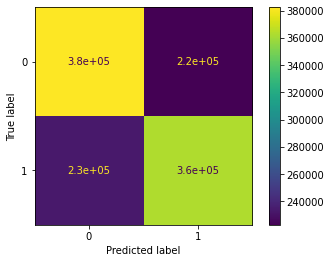

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, clf_0.predict_proba(X_train)[:,1])
print('AUC: {}'.format(auc(fpr, tpr)))
print('cross-entropy loss: {}'.format(log_loss(y_train, clf_0.predict_proba(X_train)[:,1])))
print('F1-score; {}'.format(f1_score(y_train, pred_y_train)))
plot_confusion_matrix(clf_0, X_train, y_train)

***On test set***

AUC: 0.6554707476559647
cross-entropy loss: 0.6547876047925683
F1-score; 0.6057702048341674


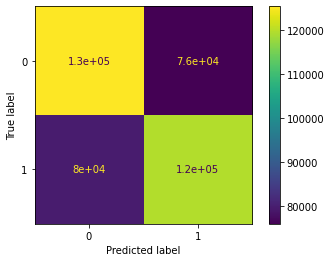

In [ ]:
pred_y_test = clf_0.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, clf_0.predict_proba(X_test)[:,1])
print('AUC: {}'.format(auc(fpr, tpr)))
print('cross-entropy loss: {}'.format(log_loss(y_test, clf_0.predict_proba(X_test)[:,1])))
print('F1-score; {}'.format(f1_score(y_test, pred_y_test)))
plot_confusion_matrix(clf_0, X_test, y_test)

# **SVM**

<div dir='rtl'>
این مدل عملا با توجه به تعداد بالای دیتا‌ها کار نمی‌کند و سرعت عمل بسیار پایین این دسته‌بند یکی از معضلات بزرگ آن است .
کاری که برای نمایش خروجی می‌توان انجام داد این است که بر روی حدود ۵۰۰۰ سمپل دیتاست لرنینگ را انجام دهیم ولی باتوجه به اینکه دیتا خیلی اسپارس است احتمال خیلی زیاد نتیجه مطلوبی کسب نمی‌شود.
<br>
با توجه به سرعت خیلی خیلی کم این روش مراحل cross validation برای انتخاب بهترین هایپر پارامتر ها هم انجام نمی‌دهیم.
<br>
عملا دراپ بک ما در اینجا این است که تعداد کمی سمپل برای لرن انتخاب می‌کنیم و حالا هایپر پارامتر تیون کردن دغدغه اول ما نیست.
</div>

In [ ]:
# train with 18k data
X_train_svc, _, y_train_svc, _ = train_test_split(X_train, y_train, test_size=0.985, random_state=42)
X_train_svc.shape

(18026, 830100)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_svc, y_train_svc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(X_train_svc.shape)
print(y_train_svc.shape)

(18026, 830100)
(18026,)


AUC: 0.9942363831196397
cross-entropy loss: 0.19927211370918005
F1-score; 0.9941788872719132


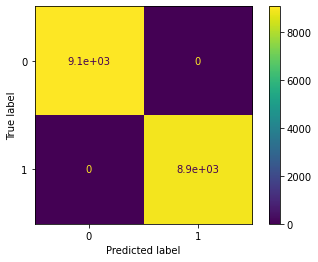

In [ ]:
# on train data
y_pred_train = svclassifier.predict(X_train_svc)
fpr_train, tpr_train, thresholds = roc_curve(y_train_svc, y_pred_train)
print('AUC: {}'.format(auc(fpr_train, tpr_train)))
print('cross-entropy loss: {}'.format(log_loss(y_train_svc, y_pred_train)))
print('F1-score; {}'.format(f1_score(y_train_svc, y_pred_train)))
plot_confusion_matrix(svclassifier, X_train_svc, y_pred_train)

AUC: 0.6554707476559647
cross-entropy loss: 14.96624277805483
F1-score; 0.5668642153988197


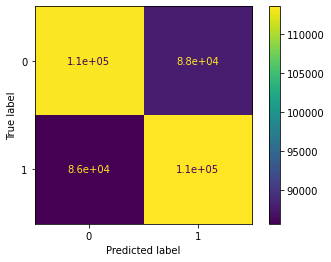

In [ ]:
# on test data
y_pred_test = svclassifier.predict(X_test)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_test)
print('AUC: {}'.format(auc(fpr_test, tpr_test)))
print('cross-entropy loss: {}'.format(log_loss(y_test, y_pred_test)))
print('F1-score; {}'.format(f1_score(y_test, y_pred_test)))
plot_confusion_matrix(svclassifier, X_test, y_test)

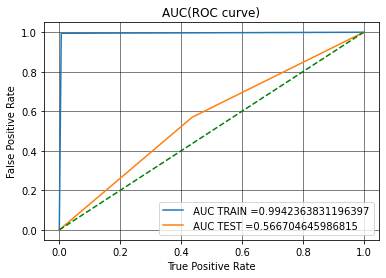

In [ ]:
plt.grid()

plt.plot(fpr_train, tpr_train, label=" AUC TRAIN ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label=" AUC TEST ="+str(auc(fpr_test, tpr_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



```
# This is formatted as code
```

# ***RandomForest***

***cross validation***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1,2,3,4]
max_depth
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              #  'min_samples_split': min_samples_split,
              #  'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# # Use the random grid to search for best hyperparameters
# from sklearn.ensemble import RandomForestClassifier
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 2, verbose=2, random_state=42, n_iter=8, n_jobs=1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)
# print('best params for RF: {}'.format(rf_random.best_params_))

***cross validation outputs***
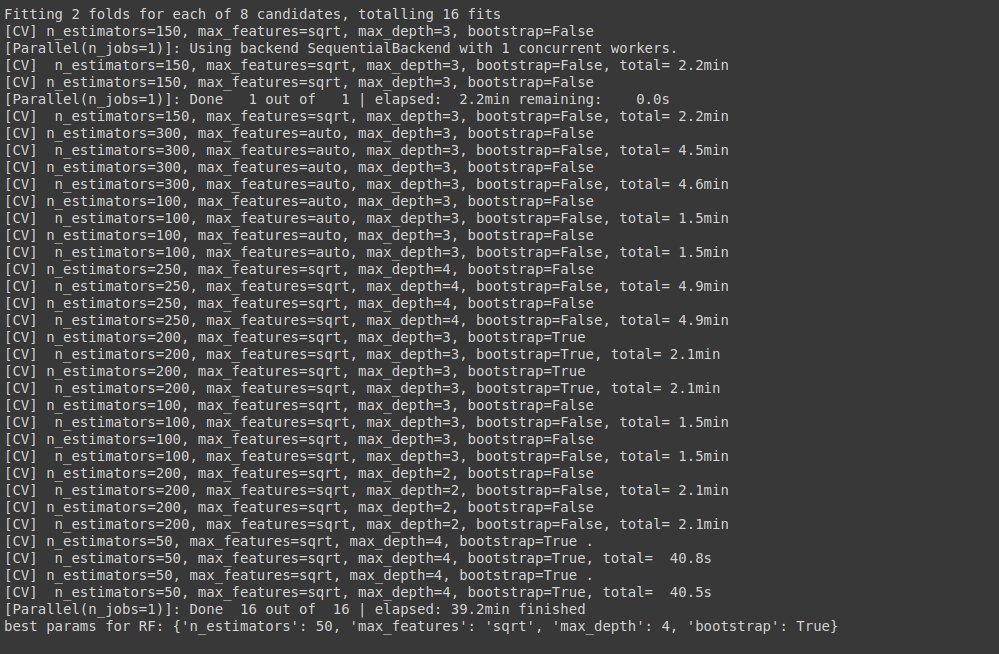

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=4, bootstrap=True)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

AUC: 0.5646762641959889
cross-entropy loss: 0.6926789339076481
F1-score; 0.08960331945029404


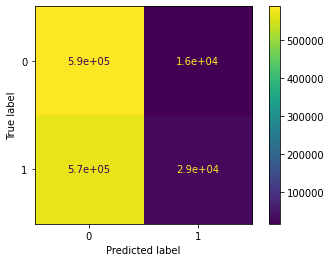

In [ ]:
pred_y_train_rf = rf_clf.predict(X_train)
fpr_train_rf, tpr_train_rf, thresholds = roc_curve(y_train, rf_clf.predict_proba(X_train)[:,1])
print('AUC: {}'.format(auc(fpr_train_rf, tpr_train_rf)))
print('cross-entropy loss: {}'.format(log_loss(y_train, rf_clf.predict_proba(X_train)[:,1])))
print('F1-score; {}'.format(f1_score(y_train, pred_y_train_rf)))
plot_confusion_matrix(rf_clf, X_train, y_train)

AUC: 0.5644741967178759
cross-entropy loss: 0.6927036141851771
F1-score; 0.09005358776630505


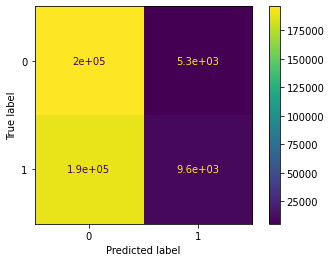

In [ ]:
pred_y_test_rf = rf_clf.predict(X_test)
fpr_test_rf, tpr_test_rf, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
print('AUC: {}'.format(auc(fpr_test_rf, tpr_test_rf)))
print('cross-entropy loss: {}'.format(log_loss(y_test, rf_clf.predict_proba(X_test)[:,1])))
print('F1-score; {}'.format(f1_score(y_test, pred_y_test_rf)))
plot_confusion_matrix(rf_clf, X_test, y_test)

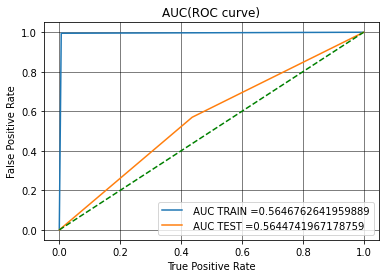

In [ ]:
plt.grid()
plt.plot(fpr_train, tpr_train, label=" AUC TRAIN ="+str(auc(fpr_train_rf, tpr_train_rf)))
plt.plot(fpr_test, tpr_test, label=" AUC TEST ="+str(auc(fpr_test_rf, tpr_test_rf)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# ***XGBoost***

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective='reg:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='reg:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

AUC: 0.5589614403232819
cross-entropy loss: 15.27256653687245
F1-score; 0.6190273398460296


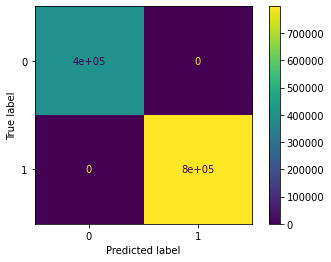

In [ ]:
y_pred_train_xg_reg = xg_reg.predict(X_train)
fpr_train_xg_reg, tpr_train_xg_reg, thresholds = roc_curve(y_train, y_pred_train_xg_reg)
print('AUC: {}'.format(auc(fpr_train_xg_reg, tpr_train_xg_reg)))
print('cross-entropy loss: {}'.format(log_loss(y_train, y_pred_train_xg_reg)))
print('F1-score; {}'.format(f1_score(y_train, y_pred_train_xg_reg)))
plot_confusion_matrix(xg_reg, X_train, y_pred_train_xg_reg)

AUC: 0.5590912460121034
cross-entropy loss: 15.257480446825895
F1-score; 0.6196190042175227


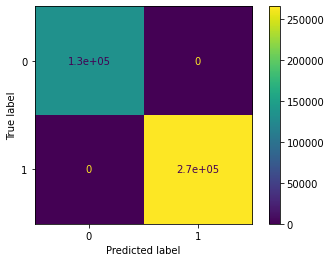

In [ ]:
y_pred_test_xg_reg = xg_reg.predict(X_test)
fpr_test_xg_reg, tpr_test_xg_reg, thresholds = roc_curve(y_test, y_pred_test_xg_reg)
print('AUC: {}'.format(auc(fpr_test_xg_reg, tpr_test_xg_reg)))
print('cross-entropy loss: {}'.format(log_loss(y_test, y_pred_test_xg_reg)))
print('F1-score; {}'.format(f1_score(y_test, y_pred_test_xg_reg)))
plot_confusion_matrix(xg_reg, X_test, y_pred_test_xg_reg)

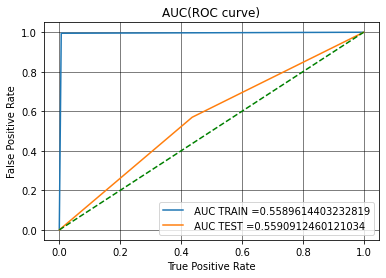

In [ ]:
plt.grid()

plt.plot(fpr_train, tpr_train, label=" AUC TRAIN ="+str(auc(fpr_train_xg_reg, tpr_train_xg_reg)))
plt.plot(fpr_test, tpr_test, label=" AUC TEST ="+str(auc(fpr_test_xg_reg, tpr_test_xg_reg)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# ***Factorization Machine***

<div dir='rtl'>
در اینجا تلاش می‌کنیم توضیح کوتاهی از این مقاله و روش ارائه دهیم.
<br>
این روش بار اول در سال ۲۰۱۰ ارائه شد، ایده اصلی پشت این روش این است که رابطه و اینترکشن میان فیچر‌ها را به بهترین نحو ممکن در مدل خود به کمک پارامتر‌های فاکتور شده دخیل کنیم.
<br>
در دیتا‌های اسپارس و عظیمی که کار و روش تخمین آن بر اساس رابطه مشترک است (مانند ریکامندر سیستم‌ها) یکی از اصول مهم این است که بتوانیم این ارتباط میان فیچر‌ها (مثلا یوزر ها یا ابجکت‌ها
را به درستی ایجاد کنیم.
یکی از نقاط ضعف روش logistic regression این است که نمی‌تواند این موضوع را به درستی نشان دهد از همین رو برای این نوع دیتا خیلی کاربر و دقت خوبی را گارانتی نمی‌کند.
<br>
از سوی دیگر در مقایسه با روش svm یکی از مشکلات این روش این است که بسیار کند عمل می‌کند و بر روی دیتا‌های بزرگ خیلی دقت خوبی ندارد.
همچنین این روش در داده‌های ماتریس به صورت تجربی به اثبات رسیده اصولا هیچجوره به مقدار خوبی نزدیک نمی‌شود و کاملا underfit شده.
<br>
اما روش FM با تعریف«
$$y(x) = w_0 + \sum_{i=1}^{n} w_ix_i + \sum_{i=1}^{n}\sum_{j=i}^{n}⟨vi,vj⟩xixj$$
هر دوش مشکلات بالا رفع کرده.
<br>
همچنین با یک بار reformulate کردن این بخش
به O(N)
می‌رسیم و همچنین برخلاف svm در حالت primal که بسیار فهمش ساده‌تر است کاملا سرعت و دقت خوبی عمل‌‌ می‌کند و همچنین بر روی داده‌های اسپارس بسیار عالی عمل می‌کند.
</div>

In [ ]:
import numpy as np
from numba import njit
from tqdm import trange
from sklearn.base import BaseEstimator, ClassifierMixin


class FactorizationMachineClassifier(BaseEstimator, ClassifierMixin):
    """
    Factorization Machine [1]_ using Stochastic Gradient Descent.
    For binary classification only.

    Parameters
    ----------
    n_iter : int, default 10
        Number of iterations to train the algorithm.

    n_factors : int, default 10
        Number/dimension of features' latent factors.

    learning_rate : float, default 0.1
        Learning rate for the gradient descent optimizer.

    reg_coef : float, default 0.01
        Regularization strength for weights/coefficients.

    reg_factors : float, default 0.01
        Regularization strength for features' latent factors.

    random_state : int, default 1234
        Seed for the randomly initialized features latent factors

    verbose : bool, default True
        Whether to print progress bar while training.

    Attributes
    ----------
    intercept_ : double
        Intercept term, w0 based on the original notations.

    coef_ : 1d ndarray, shape [n_features,]
        Coefficients, w based on the original notations.

    feature_factors_ : 2d ndarray, shape [n_factors, n_features]
        Latent factors for all features. v based on the original
        notations. The learned factors can be viewed as the
        embeddings for each features. If a pair of features tends
        to co-occur often, then their embeddings should be
        close/similar (in terms of cosine similarity) to each other.

    history_ : list
        Loss function's history at each iteration, useful
        for evaluating whether the algorithm converged or not.

    References
    ----------
    .. [1] `S. Rendle Factorization Machines (2010)
            <http://www.csie.ntu.edu.tw/~b97053/paper/Rendle2010FM.pdf>`_ 
    """

    def __init__(self, n_iter = 10, n_factors = 10,
                 learning_rate = 0.1, reg_coef = 0.01,
                 reg_factors = 0.01, random_state = 1234, verbose = False):
        self.n_iter = n_iter
        self.verbose = verbose
        self.reg_coef = reg_coef
        self.n_factors = n_factors
        self.reg_factors = reg_factors
        self.random_state = random_state
        self.learning_rate = learning_rate

    def fit(self, X, y):
        """
        Fit the model to the input data and label.

        Parameters
        ----------
        X : scipy sparse csr_matrix, shape [n_samples, n_features]
            Data in sparse matrix format.

        y : 1d ndarray, shape [n_samples,]
            Training data's corresponding label.

        Returns
        -------
        self
        """

        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0

        # the factors are often initialized with a mean of 0 and standard deviation
        # of 1 / sqrt(number of latent factor specified)
        np.random.seed(self.random_state)
        self.feature_factors_ = np.random.normal(
            scale = 1 / np.sqrt(self.n_factors), size = (self.n_factors, n_features))
        
        # the gradient is implemented in a way that requires
        # the negative class to be labeled as -1 instead of 0
        y = y.copy().astype(np.int32)
        y[y == 0] = -1

        loop = range(self.n_iter)
        if self.verbose:
            loop = trange(self.n_iter)

        self.history_ = []
        for _ in loop:
            loss = _sgd_update(X.data, X.indptr, X.indices,
                               y, n_samples, n_features,
                               self.intercept_, self.coef_,
                               self.feature_factors_, self.n_factors,
                               self.learning_rate, self.reg_coef, self.reg_factors)
            self.history_.append(loss)
            print(loss)

        return self

    def predict_proba(self, X):
        """
        Probability estimates. The returned estimates for
        all classes are ordered by the label of classes.

        Paramters
        ---------
        X : scipy sparse csr_matrix, shape [n_samples, n_features]
            Data in sparse matrix format.

        Returns
        -------
        proba : 2d ndarray, shape [n_samples, n_classes]
            The probability of the sample for each class in the model.
        """
        pred = self._predict(X)
        pred_proba = 1.0 / (1.0 + np.exp(-pred))
        proba = np.vstack((1 - pred_proba, pred_proba)).T
        return proba

    def _predict(self, X):
        """Similar to _predict_instance but vectorized for all samples"""
        linear_output = X * self.coef_
        v = self.feature_factors_.T
        term = (X * v) ** 2 - (X.power(2) * (v ** 2))
        factor_output = 0.5 * np.sum(term, axis = 1)
        return self.intercept_ + linear_output + factor_output

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters
        ----------
        X : scipy sparse csr_matrix, shape [n_samples, n_features]
            Data in sparse matrix format.

        Returns
        -------
        Predicted class label per sample.
        """
        pred_proba = self.predict_proba(X)[:, 1]
        return pred_proba.round().astype(np.int)


@njit
def _sgd_update(data, indptr, indices, y, n_samples, n_features,
                w0, w, v, n_factors, learning_rate, reg_w, reg_v):
    """
    Compute the loss of the current iteration and update
    gradients accordingly.
    """
    loss = 0.0
    for i in range(n_samples):
        pred, summed = _predict_instance(data, indptr, indices, w0, w, v, n_factors, i)
        
        # calculate loss and its gradient
        loss += _log_loss(pred, y[i])
        loss_gradient = -y[i] / (np.exp(y[i] * pred) + 1.0)
    
        # update bias/intercept term
        w0 -= learning_rate * loss_gradient

        # update weight
        for index in range(indptr[i], indptr[i + 1]):
            feature = indices[index]
            w[feature] -= learning_rate * (loss_gradient * data[index] + 2 * reg_w * w[feature])

        # update factor
        for factor in range(n_factors):
            for index in range(indptr[i], indptr[i + 1]):
                feature = indices[index]
                term = summed[factor] - v[factor, feature] * data[index]
                v_gradient = loss_gradient * data[index] * term
                v[factor, feature] -= learning_rate * (v_gradient + 2 * reg_v * v[factor, feature])
    
    loss /= n_samples
    return loss


@njit
def _predict_instance(data, indptr, indices, w0, w, v, n_factors, i):
    """predicting a single instance"""
    summed = np.zeros(n_factors)
    summed_squared = np.zeros(n_factors)

    # linear output w * x
    pred = w0
    for index in range(indptr[i], indptr[i + 1]):
        feature = indices[index]
        pred += w[feature] * data[index]

    # factor output
    for factor in range(n_factors):
        for index in range(indptr[i], indptr[i + 1]):
            feature = indices[index]
            term = v[factor, feature] * data[index]
            summed[factor] += term
            summed_squared[factor] += term * term

        pred += 0.5 * (summed[factor] * summed[factor] - summed_squared[factor])
    
    # summed is the independent term that can be re-used
    # during the gradient update stage
    return pred, summed


@njit
def _log_loss(pred, y):
    """
    negative log likelihood of the
    current prediction and label, y.
    """
    return np.log(np.exp(-pred * y) + 1.0)

<div dir='rtl'>
در این بخش با توجه به هایپر‌پارامتر‌هایی کی تیون کردیم مدل را اجرا می‌کنیم.

In [ ]:
fm = FactorizationMachineClassifier(n_iter = 150, learning_rate = 0.1, reg_factors=0.02, reg_coef=0.01, n_factors=10)
fm.fit(X_train, y_train.to_numpy())

0.10057226754934954
0.0718633024128358
0.0506970672041888
0.03499945933090657
0.025609494301207174
0.02220941154438104
0.021158668404846873
0.020652004883439514
0.020316799442116912
0.020071132653994985
0.019881558346666873
0.01973034102437943
0.019606765648525527
0.01950383932175615
0.019416744609879317
0.019342046701199878
0.019277267963022874
0.019220485660376086
0.01917010609606153
0.01912491128785001
0.019083995642099408
0.019046638359128135
0.019012252230840535
0.018980354072857156
0.0189505427208828
0.018922482282238726
0.018895889207443093
0.01887052225202472
0.018846174660720093
0.018822668076282554
0.01879984781128736
0.01877757923243027
0.018755745099770807
0.018734243778082388
0.01871298826311476
0.01869190583334036
0.018670937604033655
0.018650036193704835
0.018629159724565515
0.018608266954854534
0.018587327092213977
0.01856633141517658
0.018545262457972396
0.018524058486618252
0.018502647273203075
0.01848099434022762
0.018459099141933364
0.018436971071578694
0.0184146191

FactorizationMachineClassifier(learning_rate=0.1, n_factors=10, n_iter=150,
                               random_state=1234, reg_coef=0.01,
                               reg_factors=0.02, verbose=False)

<div dir='rtl'>
خطا مدل را در مراحل آن رسم می‌کنیم.
</div>

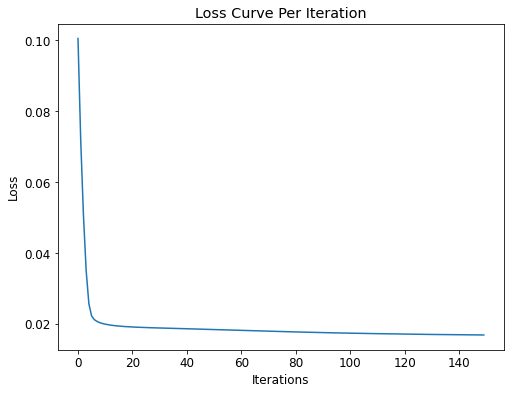

In [ ]:
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12
plt.plot(fm.history_)
plt.title('Loss Curve Per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_prob = fm.predict_proba(X_train)[:, 1]
y_pred_train_fm = [1 if i > 0.5 else 0 for i in y_pred_prob ]

auc = roc_auc_score(y_train, y_pred_train_fm)
print('auc', auc)
print('cross-entropy loss: {}'.format(log_loss(y_train, y_pred_train_fm)))
print('F1-score; {}'.format(f1_score(y_train, y_pred_train_fm)))

auc 0.5000330442932002
cross-entropy loss: 17.38834548442818
F1-score; 0.6635932093311366


In [ ]:
y_pred_prob_test = fm.predict_proba(X_test)[:, 1]
y_pred_test = [1 if i > 0.5 else 0 for i in y_pred_prob_test ]
auc_test = roc_auc_score(y_test, y_pred_test)
print('auc', auc_test)
print('cross-entropy loss: {}'.format(log_loss(y_test, y_pred_test)))
print('F1-score; {}'.format(f1_score(y_test, y_pred_test)))

auc 0.5000198446980457
cross-entropy loss: 17.356787490348097
F1-score; 0.6644138662256646


<div dir='rtl'>
در شکل زیر هیت‌مپ کورلیشن میان فیچر وکتور‌های مدل ترین شده را مشاهده می‌کنید:
</div>

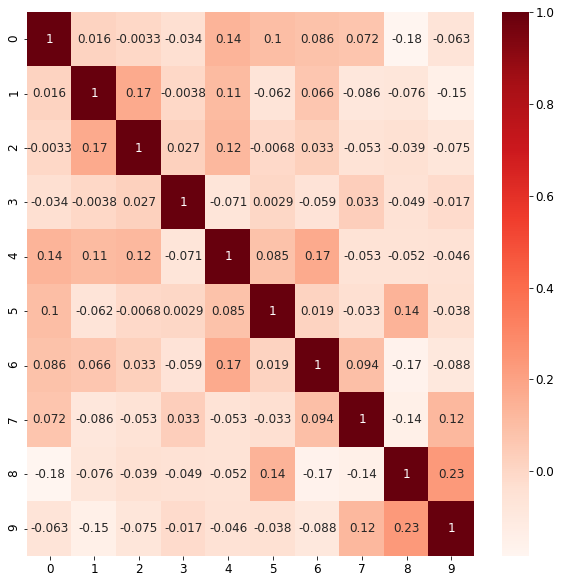

In [ ]:
cor = np.corrcoef(fm.feature_factors_)
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Field Weighted Factorization Machine

In [ ]:
pip install deepctr[gpu]

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from deepctr.models import *
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names

In [ ]:
df_drop_downsampled.head()

In [ ]:
df_drop_downsampled.columns

In [ ]:
cat_features = ['dayOfWeek', 'hourOfDay', 'advertiserId', 'campaignId', 'creativeId',
       'widgetId', 'device', 'browser', 'source', 'docId', 'userId']

data = df_drop_downsampled.copy()

for feat in cat_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

data.head()

In [ ]:
fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=data[feat].nunique(),embedding_dim=10)
                        for i,feat in enumerate(cat_features)]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [ ]:
len(feature_names)

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=2020)
train_model_input = {name:train[name] for name in feature_names}
test_model_input = {name:test[name] for name in feature_names}

In [ ]:
model = FwFM(linear_feature_columns, dnn_feature_columns)
model.compile(optimizer='adam', loss="binary_crossentropy",
              metrics=['AUC', 'BinaryCrossentropy', 'Accuracy'])

In [ ]:
history = model.fit(train_model_input, train['clicked'].values,
                    batch_size=256, epochs=10, verbose=2, validation_split=0.2)

In [ ]:
loss, auc, crossentropy_score, accuracy = model.evaluate(train_model_input, train['clicked'], verbose=0)

In [ ]:
print(classification_report(train['clicked'].values, y_pred_train,
                      target_names=['Click_Yes', 'Click_No']))

In [ ]:
accuracy_score(train['clicked'].values, y_pred_train)

In [ ]:
loss, auc, crossentropy_score, accuracy = model.evaluate(test_model_input, test['clicked'], verbose=0)

In [ ]:
y_pred = np.array(model.predict(test_model_input, batch_size=256))

y_pred_test = np.zeros(y_pred.shape, dtype=np.int8)
y_pred_test[y_pred >= 0.5] = 1
y_pred_test = y_pred_test.flatten()
y_pred_test

In [ ]:
print(classification_report(test['clicked'].values, y_pred_test,
                      target_names=['Click_Yes', 'Click_No']))

In [ ]:
accuracy_score(test['clicked'].values, y_pred_test)

***saving model***

In [ ]:
model.save('/content/drive/MyDrive/SUT/Term7/ML/ProjectDataset/FWFM_Default')
model.save_weights('/content/drive/MyDrive/SUT/Term7/ML/ProjectDataset/FWFM_Default_weights.h5')

NameError: ignored

***Loading model***

In [ ]:
from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/SUT/Term7/ML/ProjectDataset/FWFM_Default')
model.load_weights('/content/drive/MyDrive/SUT/Term7/ML/ProjectDataset/FWFM_Default_weights.h5')

In [ ]:
model.get_config()

***plotting heatmap***

In [ ]:
field_cnt = len(cat_features)
field_cnt

In [ ]:
field_similarities = np.zeros((field_cnt, field_cnt))
field_pairs = []

for i in range(field_cnt):
  for j in range(i+1, field_cnt):
    field1 = cat_features[i]
    field2 = cat_features[j]
    field_pairs.append(field1 + "::" + field2)

    weights1 = model.get_layer('sparse_emb_'+field1).get_weights()[0]
    weights2 = model.get_layer('sparse_emb_'+field2).get_weights()[0]

    rows, cols = weights1.shape[0], weights2.shape[0]
    acc = 0
    for row in range(rows):
      acc += np.dot(weights1[row, :], weights2.T).sum()
    
    print(field1, field2)
    field_similarities[i,j] = acc/(rows*cols)

In [ ]:
sns.heatmap(field_similarities,
            xticklabels=cat_features, yticklabels=cat_features)

## Working Implementaion

<div dir='rtl'>
بخش گرفتن خروجی و توضیحات کامل‌تر در نوت‌بوک لینک داده شده زیر آمده است.
</div>


پیاده‌سازی به همراه خروجی‌ها در [این نوت‌بوک](https://colab.research.google.com/drive/1Rz8g9hdbrekcpGF2GHCgUPtl4dZsmaTw?usp=sharing) آمده است


# ***مقایسه مدل‌ها***

<div dir='rtl'>
بوضوح با توجه به خروجی‌های بدست آمده بهترین مدل FWFm بوده
.
بعد از آن با توجه به در نظر گرفتن همه معیار‌ها 
FM بهترین بوده.
<br>
اما در مورد بقیه مدل‌ها با توجه به در نظر گرفتم همه معیار‌ها بنظر می‌رسد
Xgboost
و 
linear regression
از دیگران بهتر عمل کرده
و 
SVM
و
Randomforest
خیلی دقت بالایی را کسب نمی‌کنند.
همچنین SVM مشکلات زیادی ازجمله کندی زیاد و عدم تطبیق پذیری با دیتا زیاد و دیتا اسپارس دارد.
البته این موارد کمی بیشتر در لینک مدیوم که در زیر قرار داده شده توضیح داده شده است.
</div>

# ***Medium Post***

You can see detailed work expalanation in this [Medium post](https://nima0fathi.medium.com/classification-in-click-through-rate-prediction-in-display-advertising-a487a03f8631)

# ***Video***

[explaination link](https://drive.google.com/drive/folders/1j2Oq_bJ-SvN2IayeDj875TyaQ2AxQlFs?usp=sharing)